In [4788]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings

In [4789]:
house_df = pd.read_csv('train.csv')

In [4790]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4791]:
house_df.shape

(1460, 81)

In [4792]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Preparation and handling

#### NA (No Access) is a valid value for the input feature Alley. Mapping NA value with No Access so that when we apply drop method to filter out features with high NA values are retained. Likewise filling NA values(which are not truly NA) with value defined in the dataset for the feature columns 'PoolQC', 'Fence', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual'

In [4793]:
house_df.Alley.fillna('No Access', inplace=True)

In [4794]:
house_df.PoolQC.fillna('No Pool', inplace=True)

In [4795]:
house_df.Fence.fillna('No Fence', inplace=True)

In [4796]:
house_df.BsmtQual.fillna('No Basement', inplace=True)

In [4797]:
house_df.BsmtCond.fillna('No Basement', inplace=True)

In [4798]:
house_df.BsmtExposure.fillna('No Basement', inplace=True)

In [4799]:
house_df.BsmtFinType1.fillna('No Basement', inplace=True)

In [4800]:
house_df.BsmtFinType2.fillna('No Basement', inplace=True)

In [4801]:
house_df.FireplaceQu.fillna('No Fireplace', inplace=True)

In [4802]:
house_df.GarageType.fillna('No Garage', inplace=True)

In [4803]:
house_df.GarageCond.fillna('No Garage', inplace=True)

In [4804]:
house_df.GarageFinish.fillna('No Garage', inplace=True)

In [4805]:
house_df.GarageQual.fillna('No Garage', inplace=True)

In [4806]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4807]:
house_df.loc[:,house_df.isnull().sum()*100/len(house_df) > 90].columns

Index(['MiscFeature'], dtype='object')

#### Dropping features from the data set which has more than 80% of null values 

In [4808]:
house_df.drop(list(house_df.loc[:,house_df.isnull().sum()*100/len(house_df) > 80].columns), axis=1, inplace=True)

In [4809]:
house_df.shape

(1460, 80)

#### Dropping Id column as it doesn't give any predictive power to the model. It is a mere row index

In [4810]:
house_df.drop('Id', axis=1, inplace=True)

In [4811]:
house_df.shape

(1460, 79)

#### Drop all feature columns which has the same value for all the records in the data set if present 

In [4812]:
constant_value_features = [col for col in list(house_df.columns) if len(house_df[col].value_counts()) == 1]

constant_value_features       

[]

#### MSSubClass is also a categorical column. Mapping the values in the column to categories as mentioned in data set

In [4813]:
dict_map1 = {20: '1S_1946_NA', 30:'1S_1945_O', 40: '1S_WFA', 45: '1.5S_UF', 50: '1.5S_F', 60: '2S_1946_N', 70: '2S_1945_O', 75: '2.5_SA', 80:'SM', 85:'SF',90:'DA',120:'1S_P_1946', 150:'1.5S_P_A', 160:'2S_P_1946_N', 180:'PM', 190:'2_FC'}

In [4814]:
house_df.MSSubClass = house_df.MSSubClass.map(dict_map1, na_action='ignore')

In [4815]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4816]:
house_df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Performing EDA

#### Bivariate analysis of SalePrice and the remaining numeric columns in the data set

In [4817]:
# all numeric (float and int) variables in the dataset
house_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [4818]:
house_numeric_columns = list(house_numeric.columns)
house_numeric_columns.remove('SalePrice')
house_numeric_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

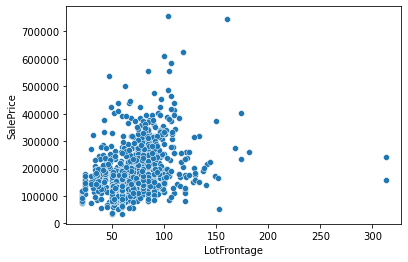

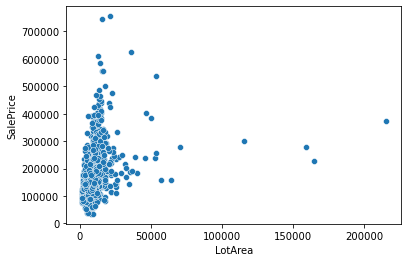

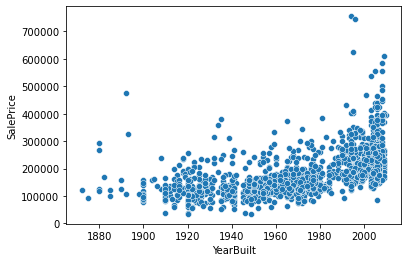

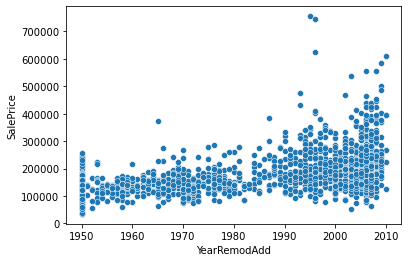

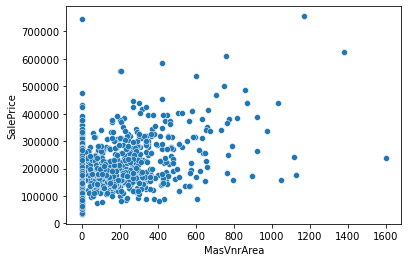

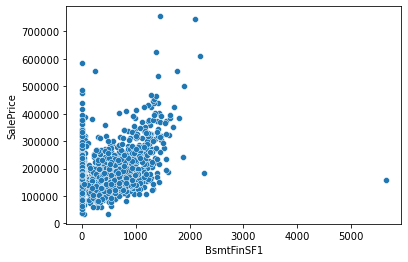

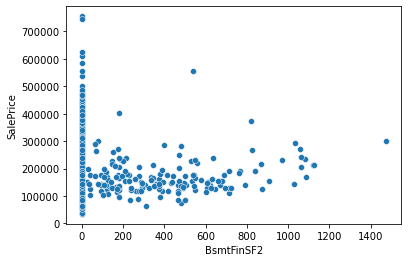

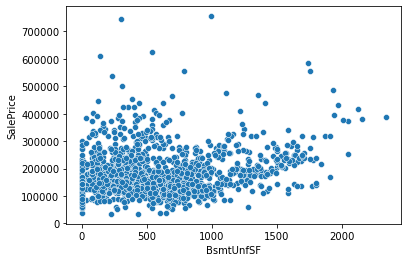

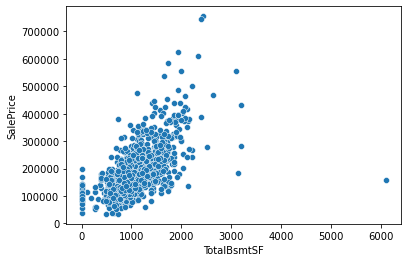

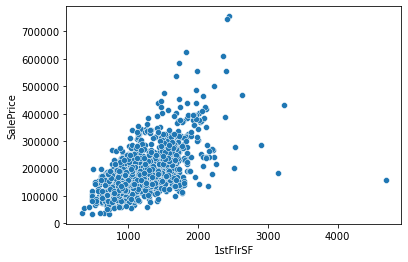

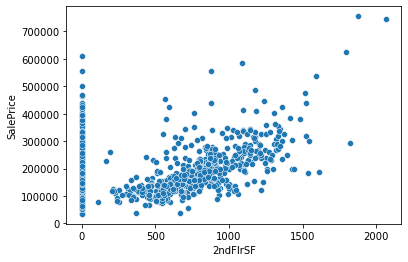

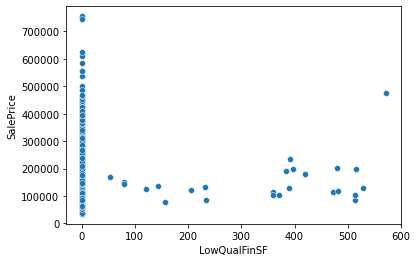

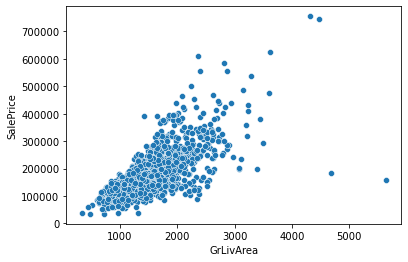

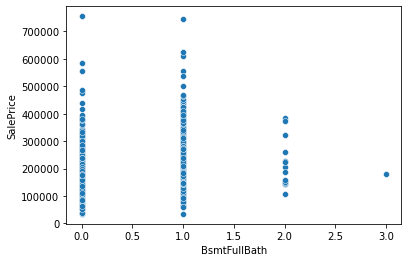

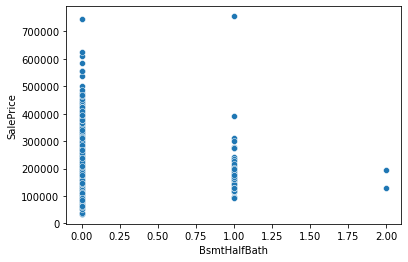

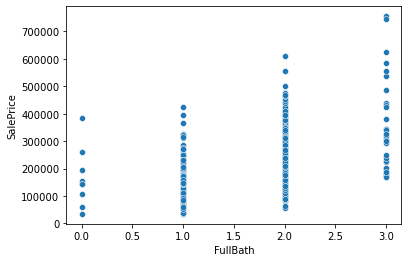

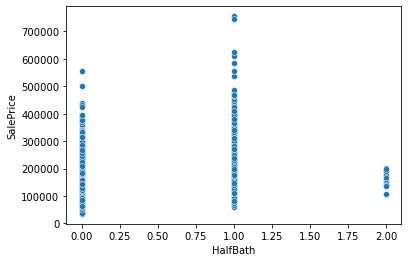

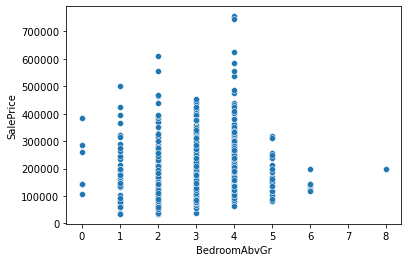

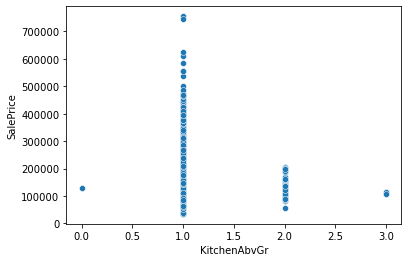

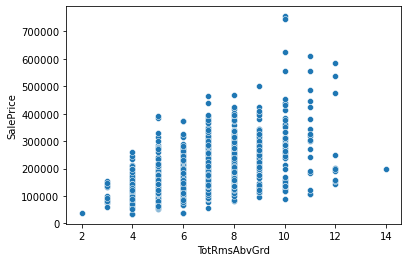

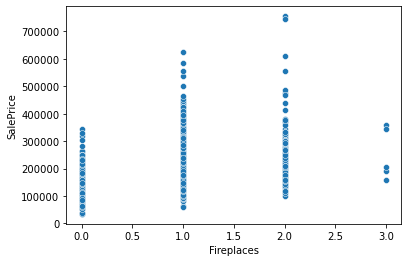

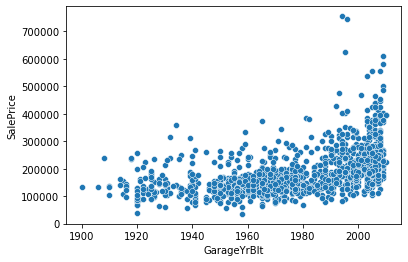

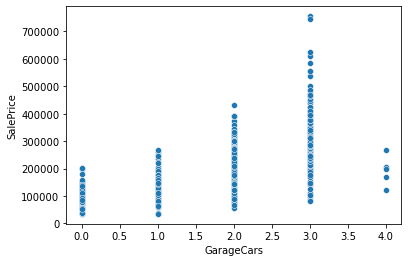

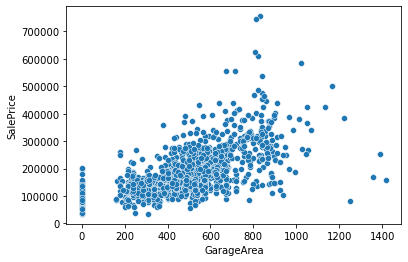

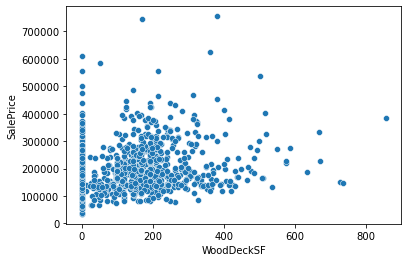

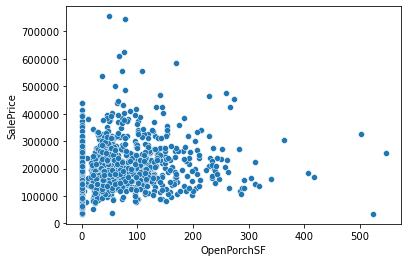

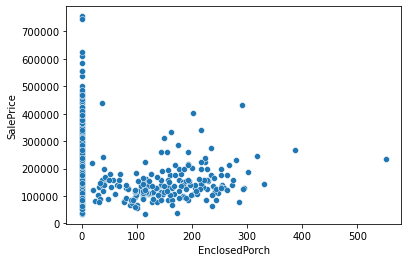

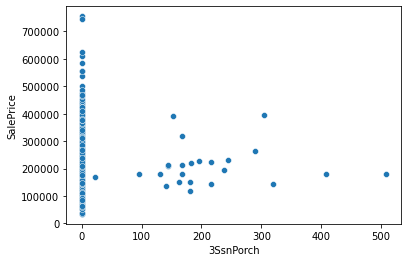

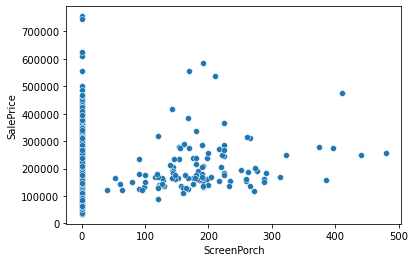

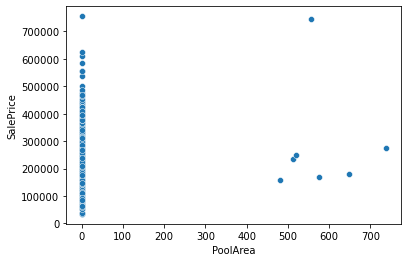

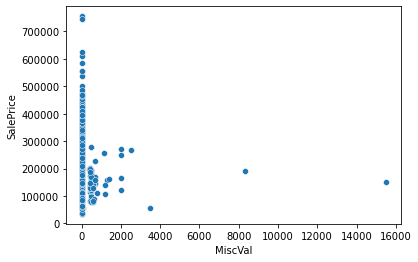

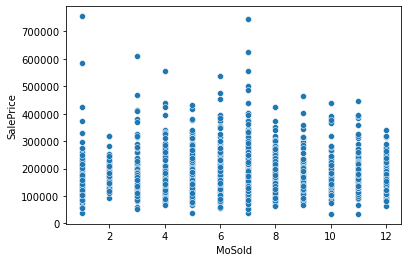

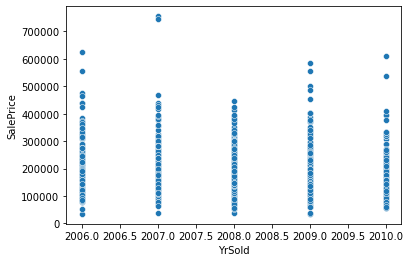

In [4819]:
for col in numeric_columns:  
    sns.scatterplot(x=col, y='SalePrice', data=house_df)
    plt.show()

#### Bivariate Variate Analysis of SalePrice and the categorical features in the dataset

In [4820]:
house_categorical = house_df.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,2S_1946_N,RL,Pave,No Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal
1,1S_1946_NA,RL,Pave,No Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal
2,2S_1946_N,RL,Pave,No Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal
3,2S_1945_O,RL,Pave,No Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,2S_1946_N,RL,Pave,No Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal


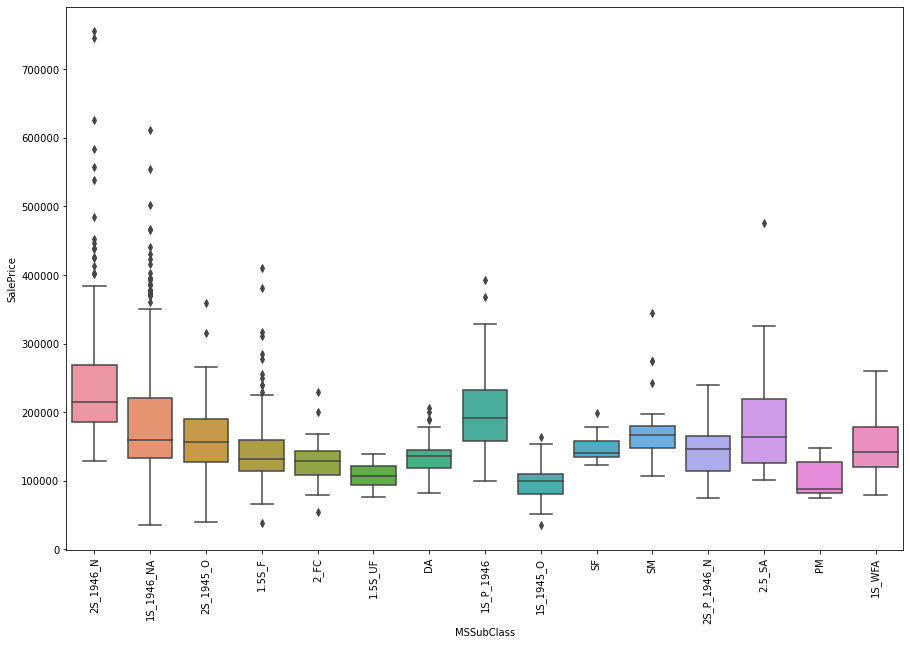

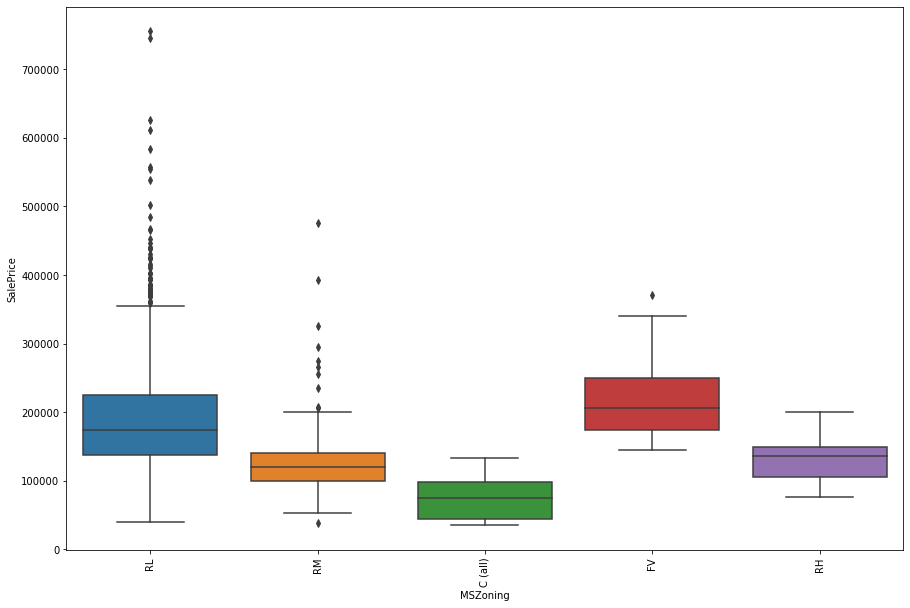

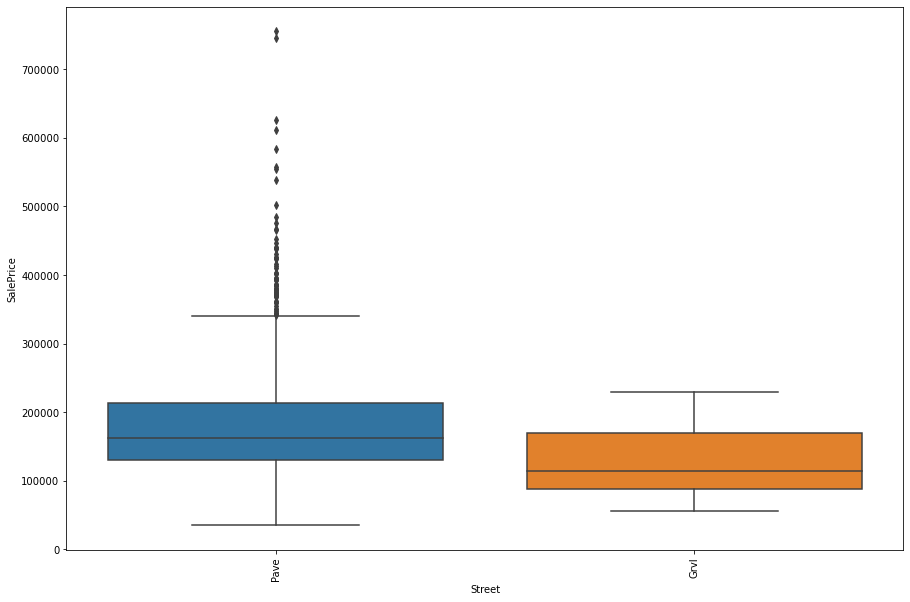

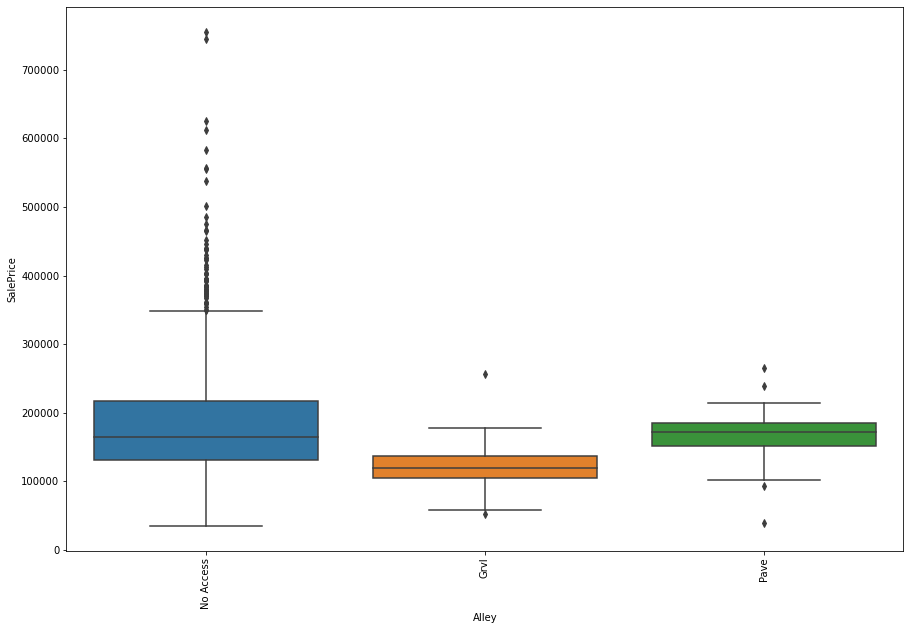

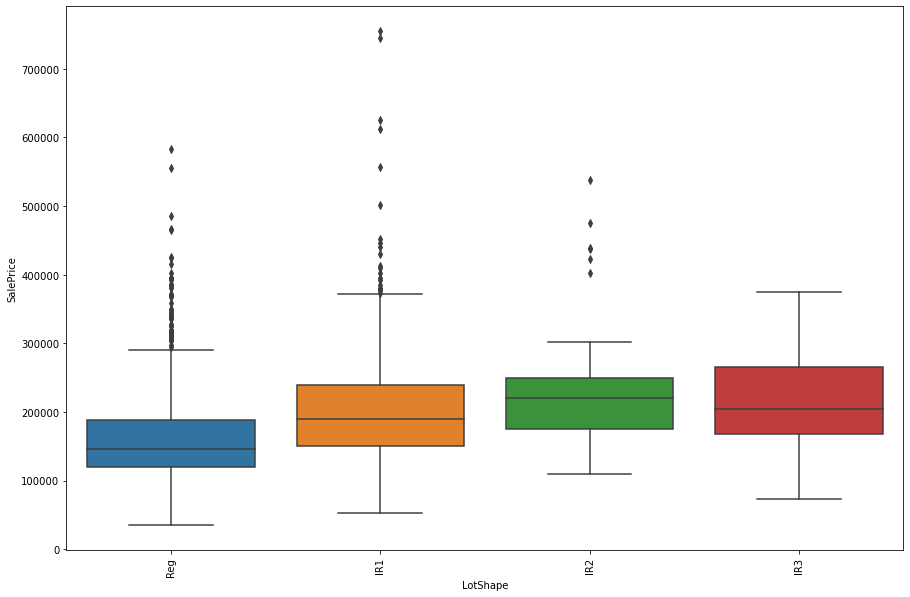

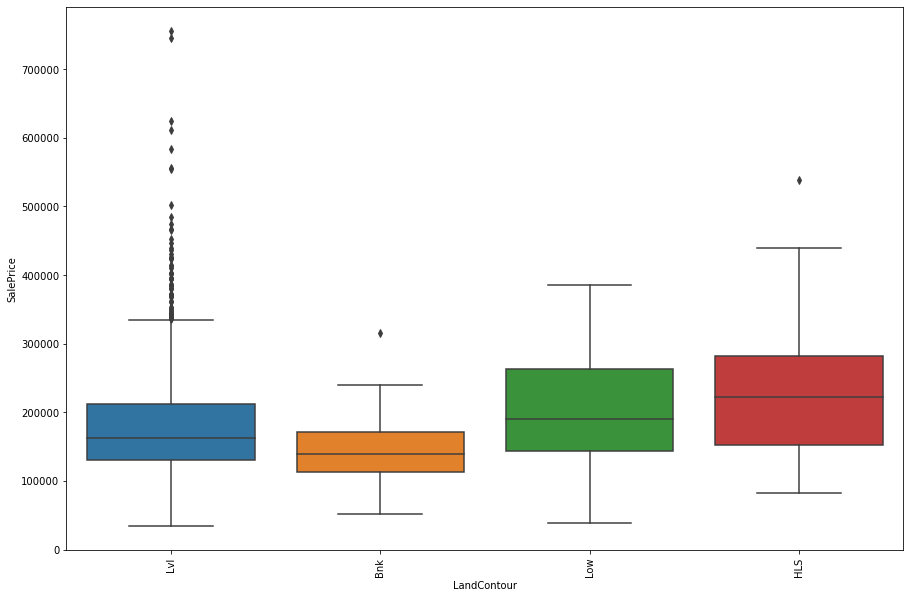

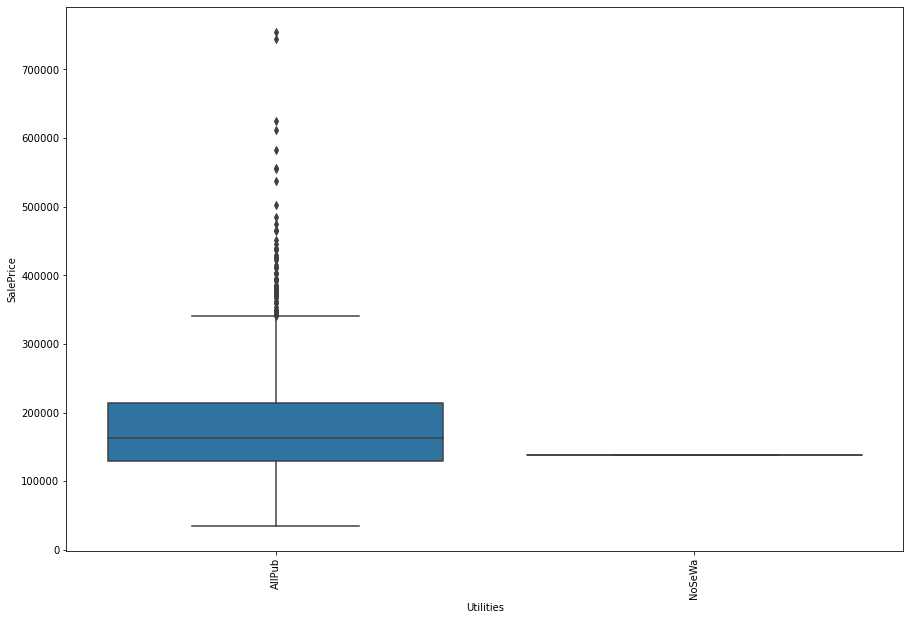

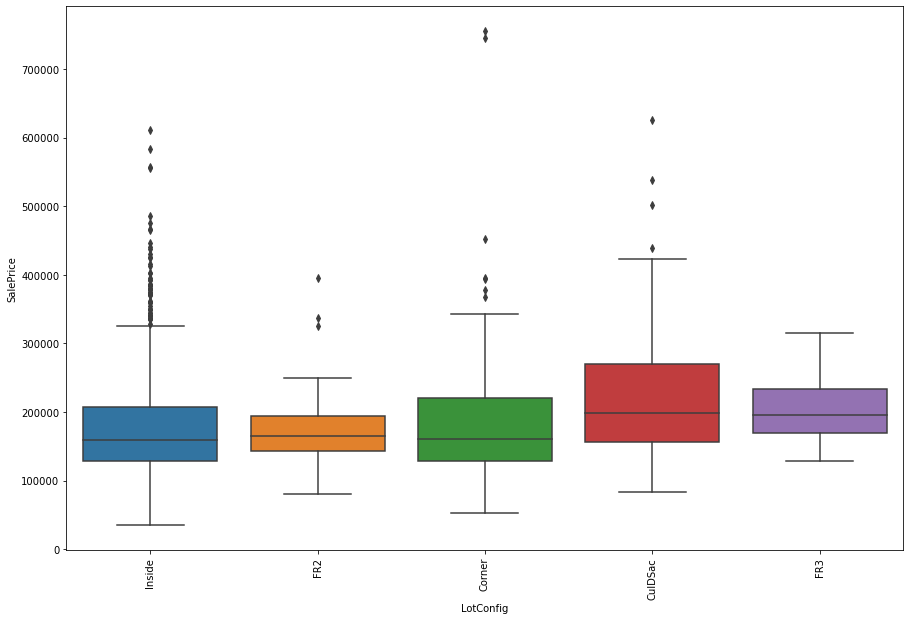

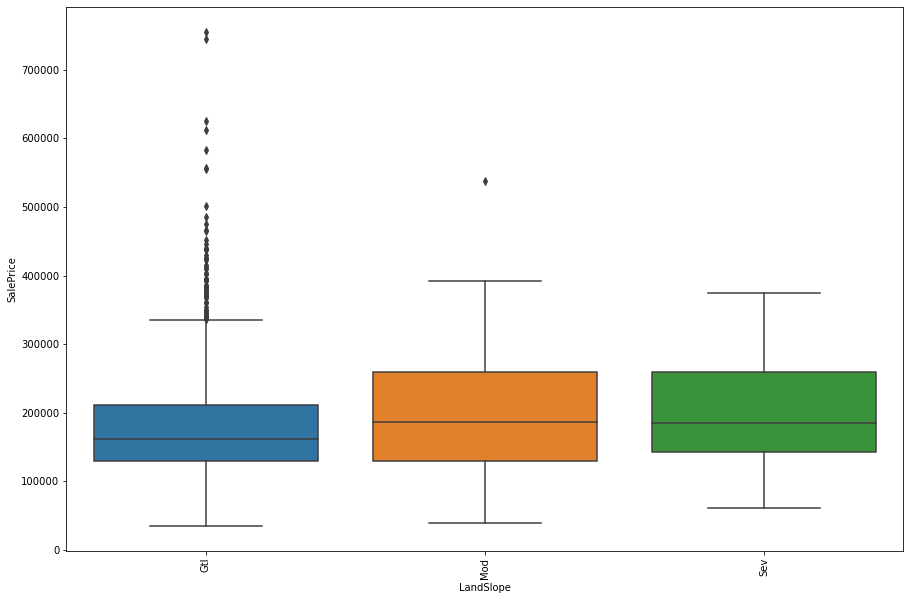

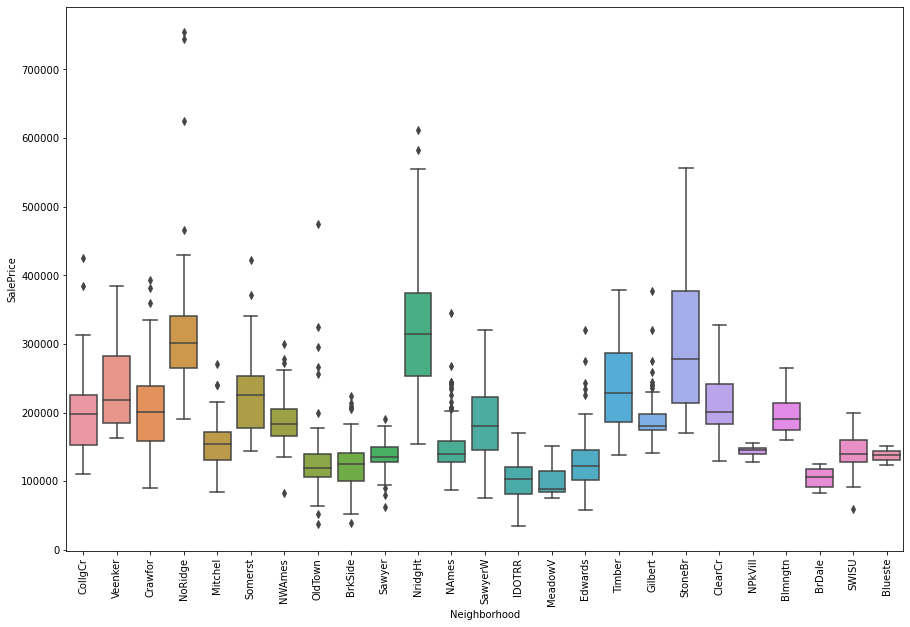

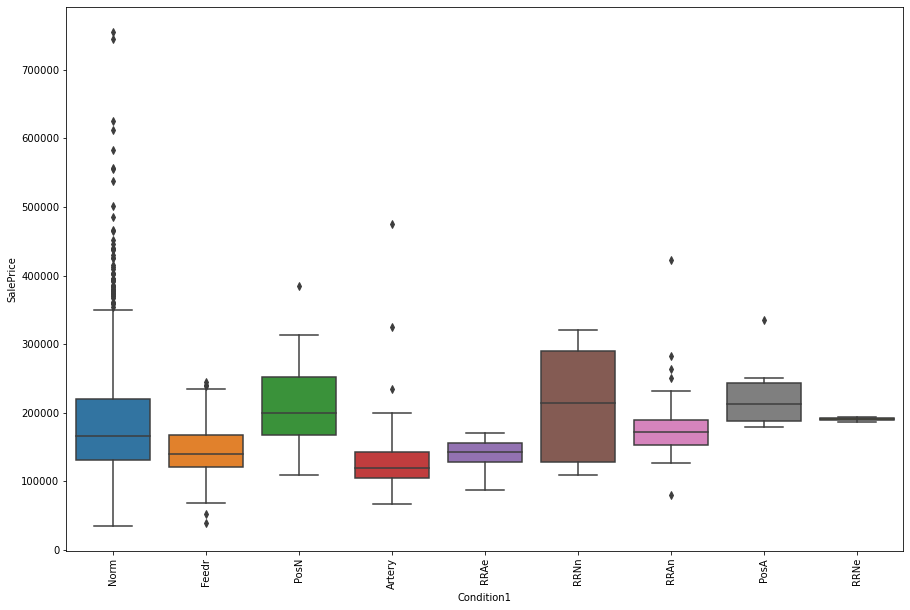

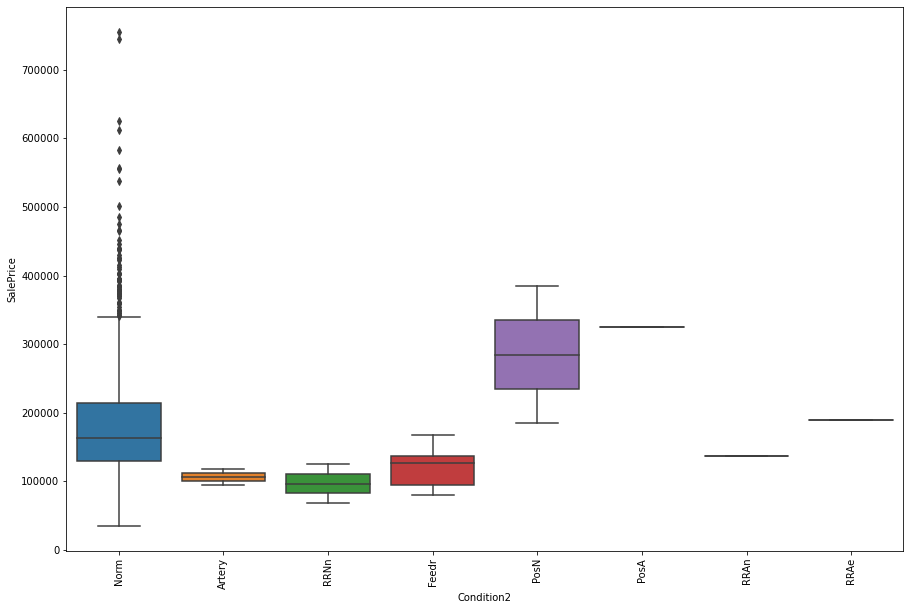

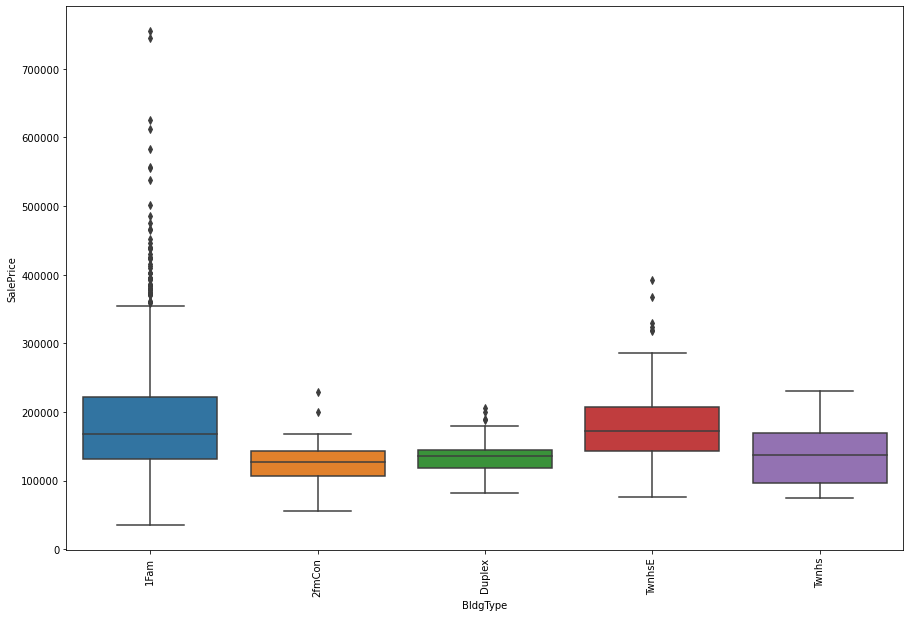

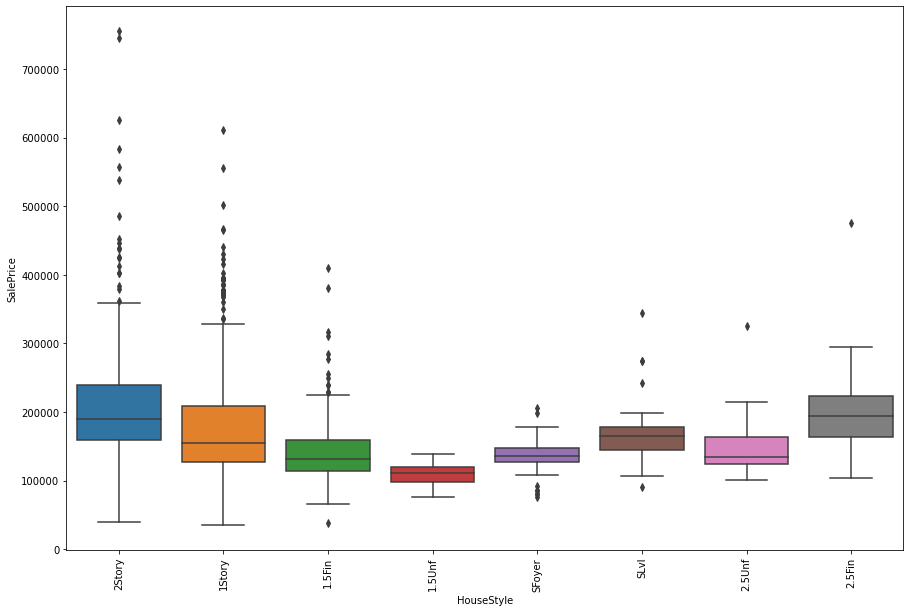

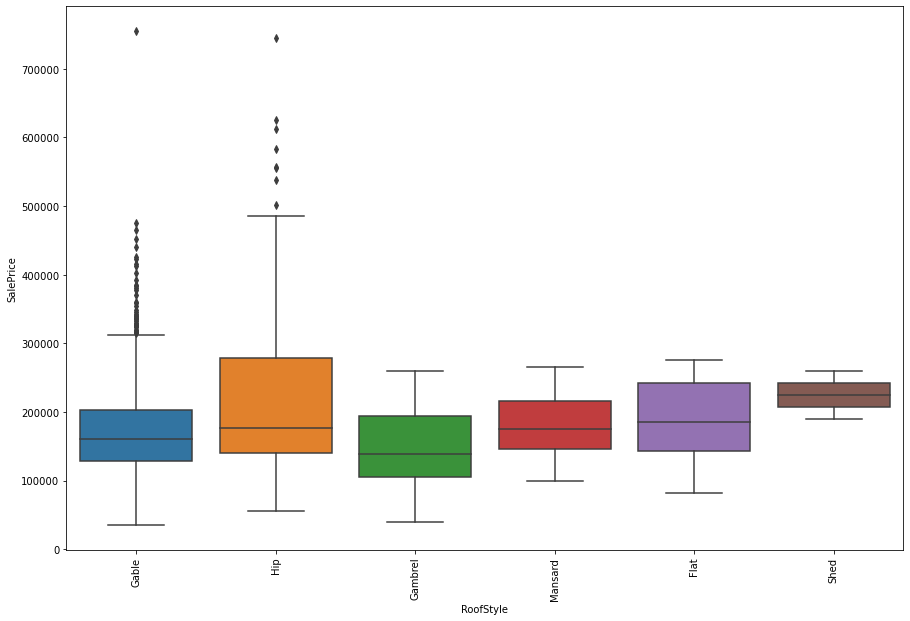

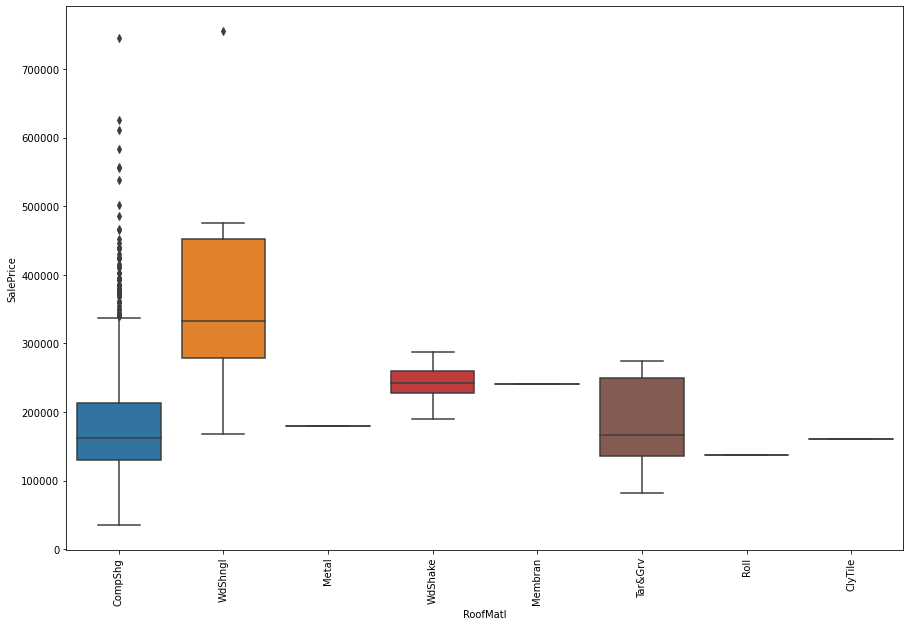

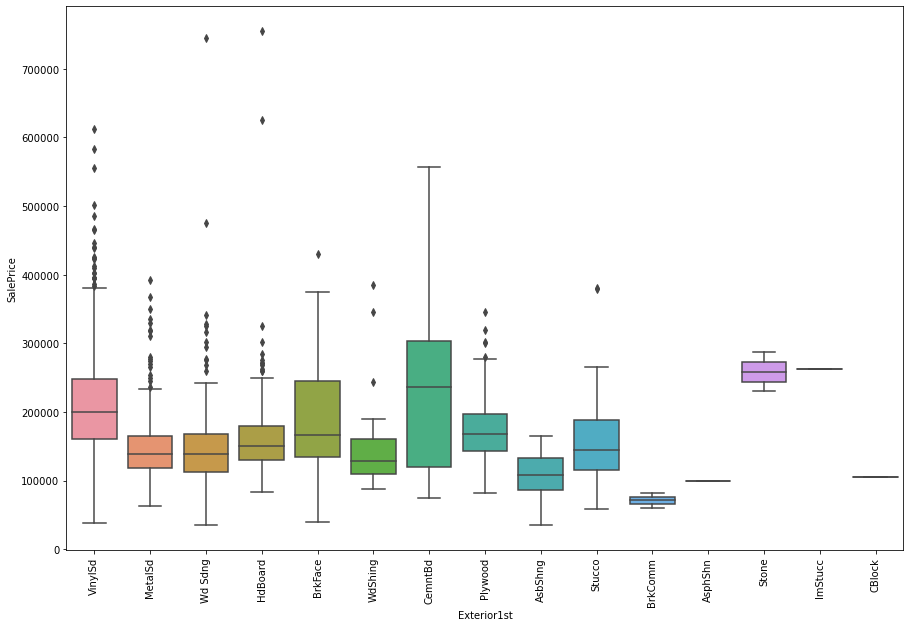

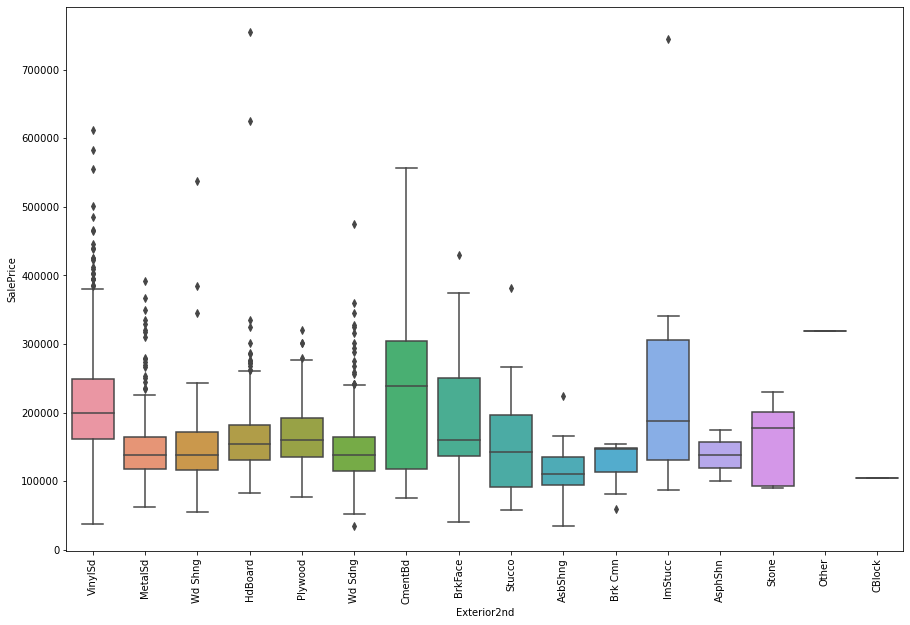

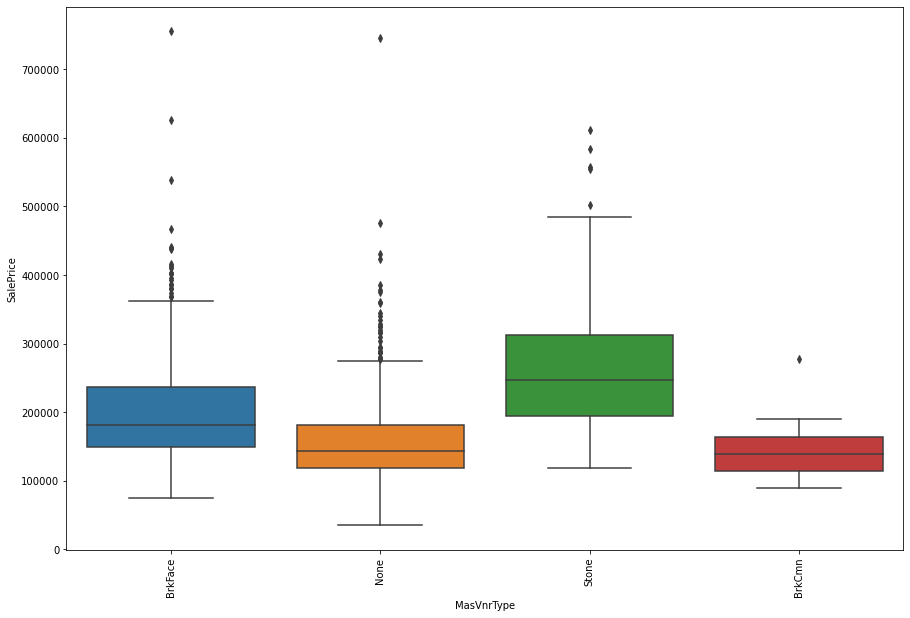

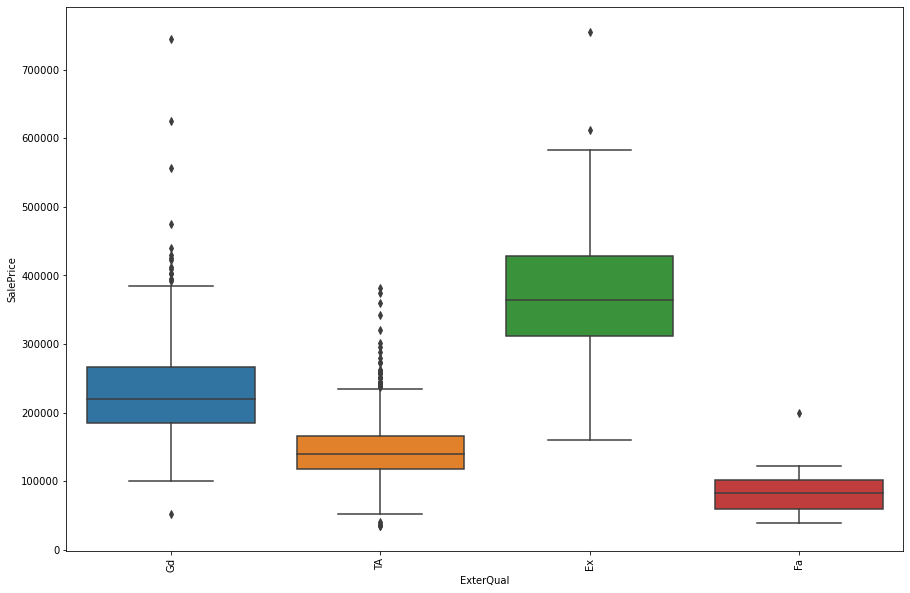

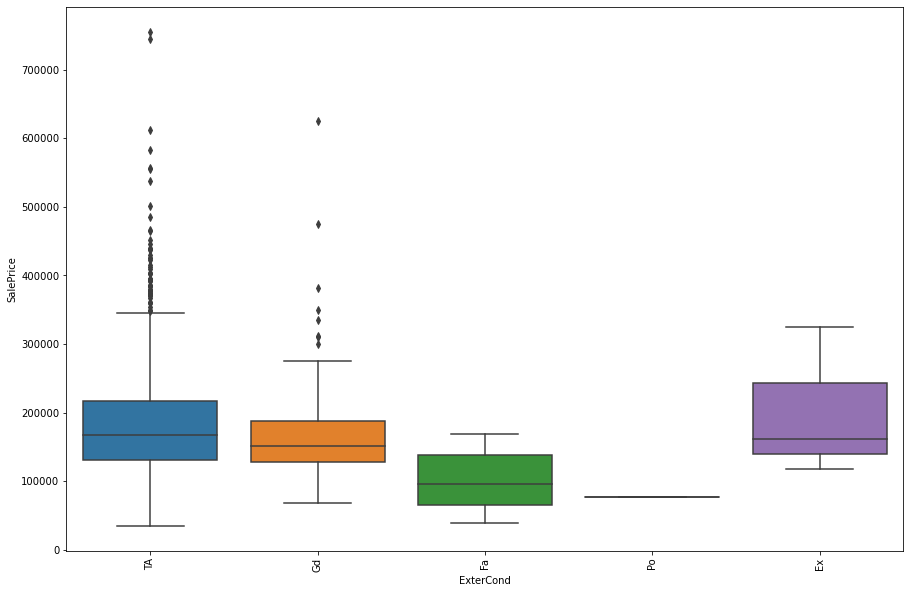

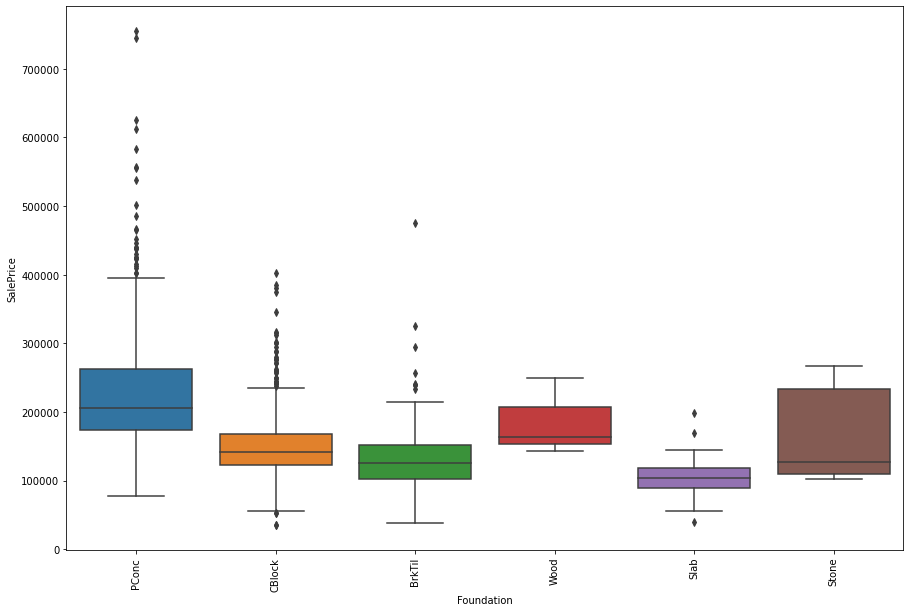

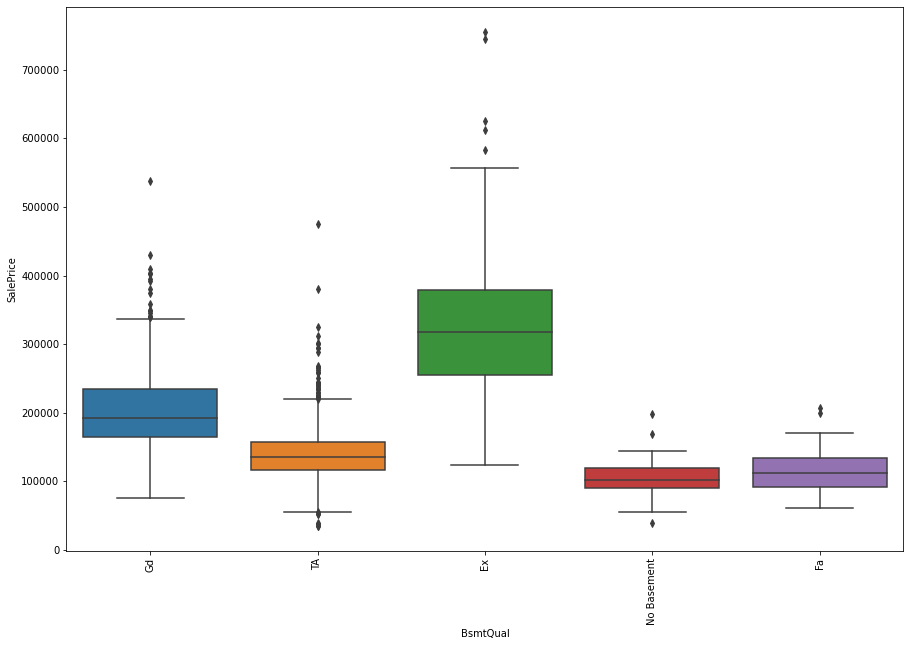

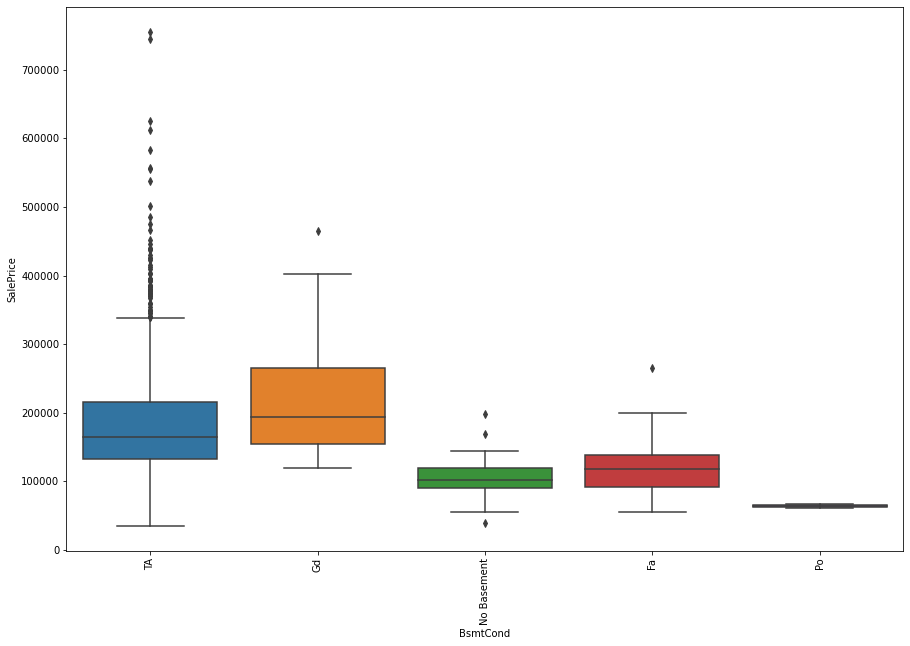

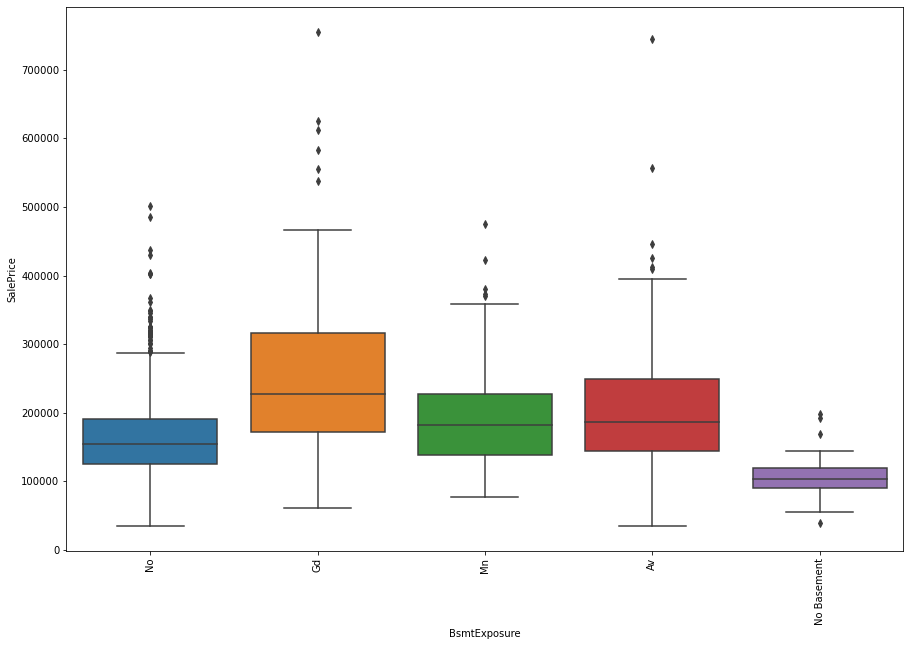

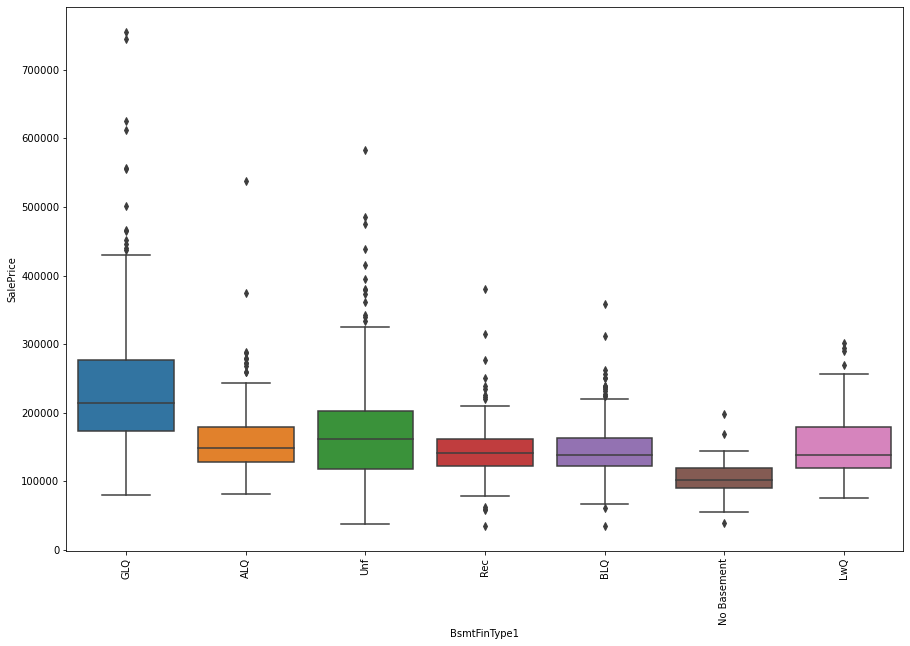

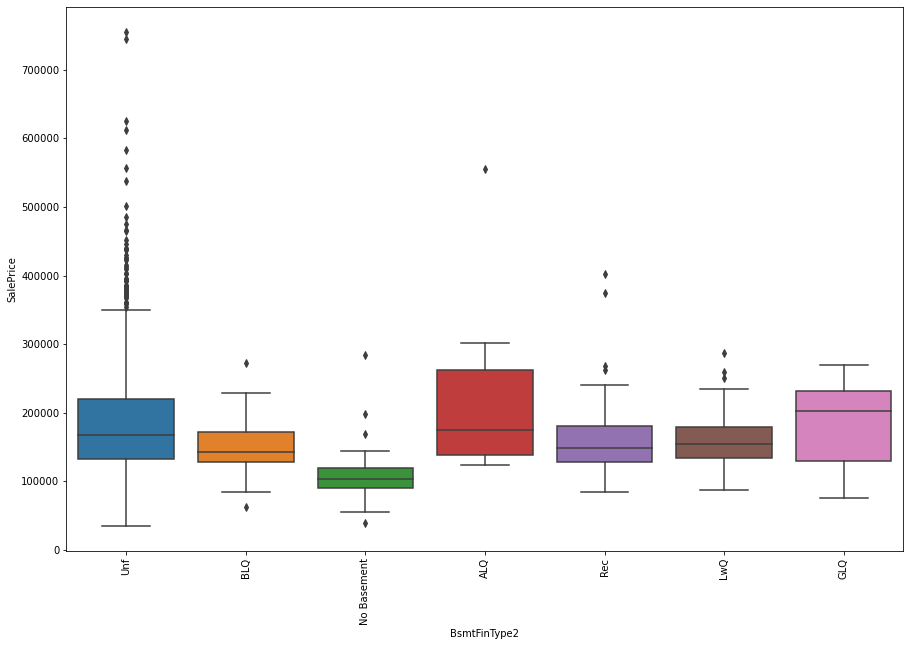

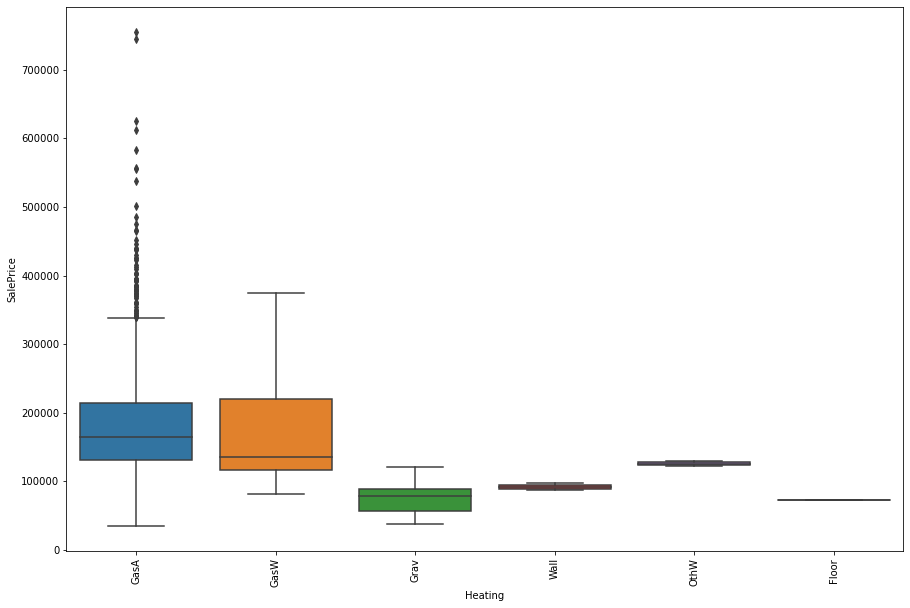

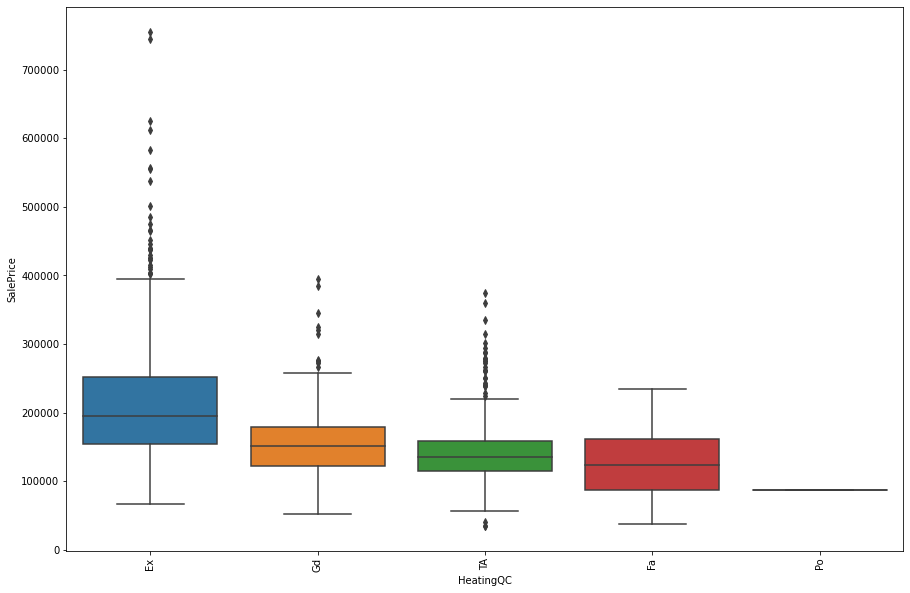

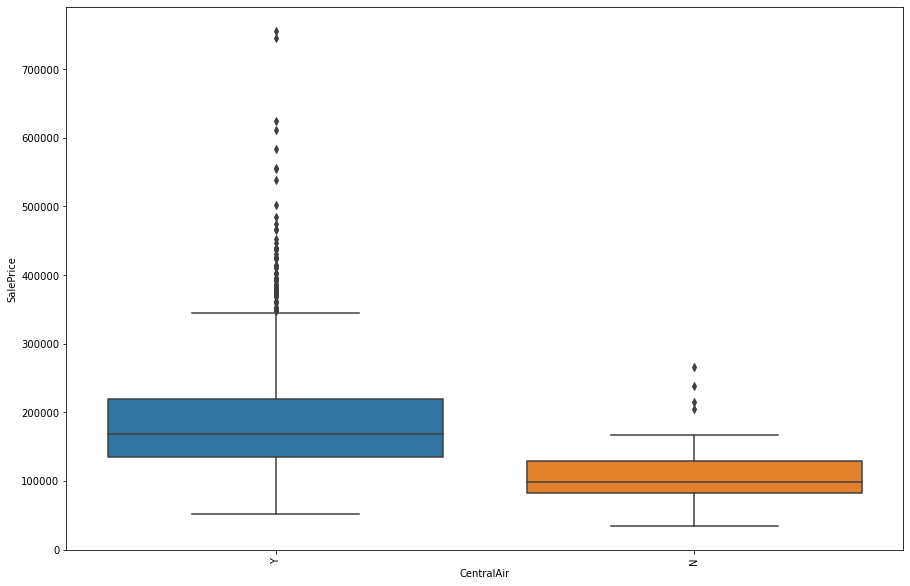

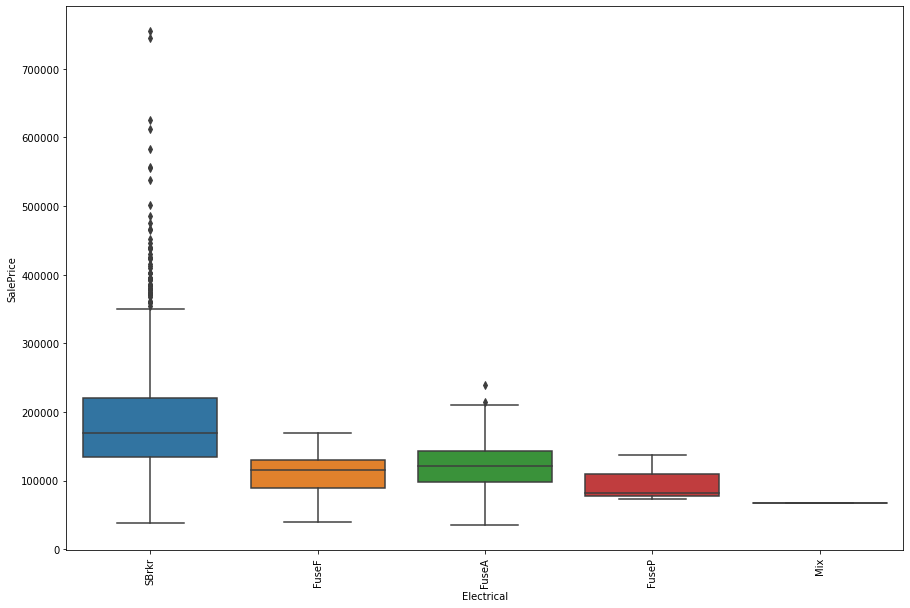

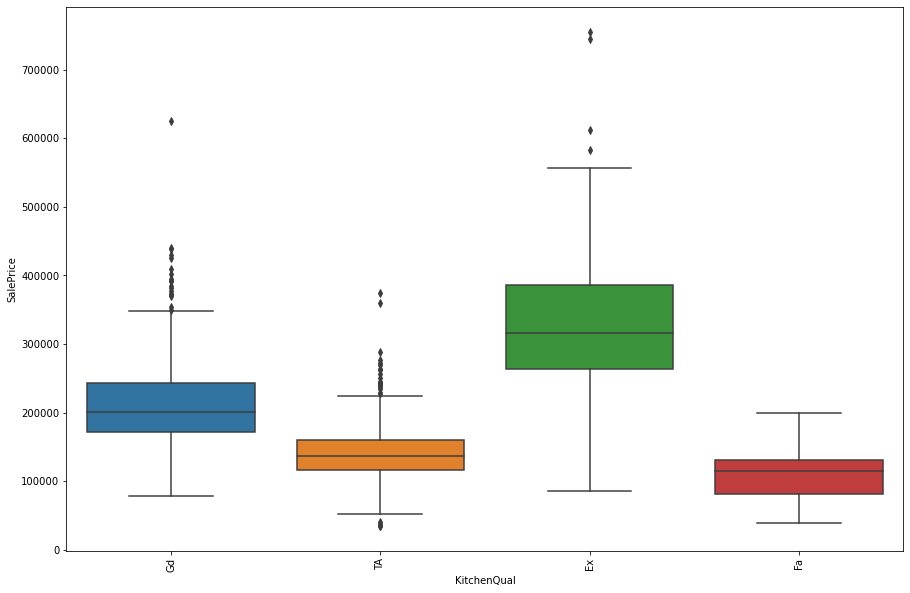

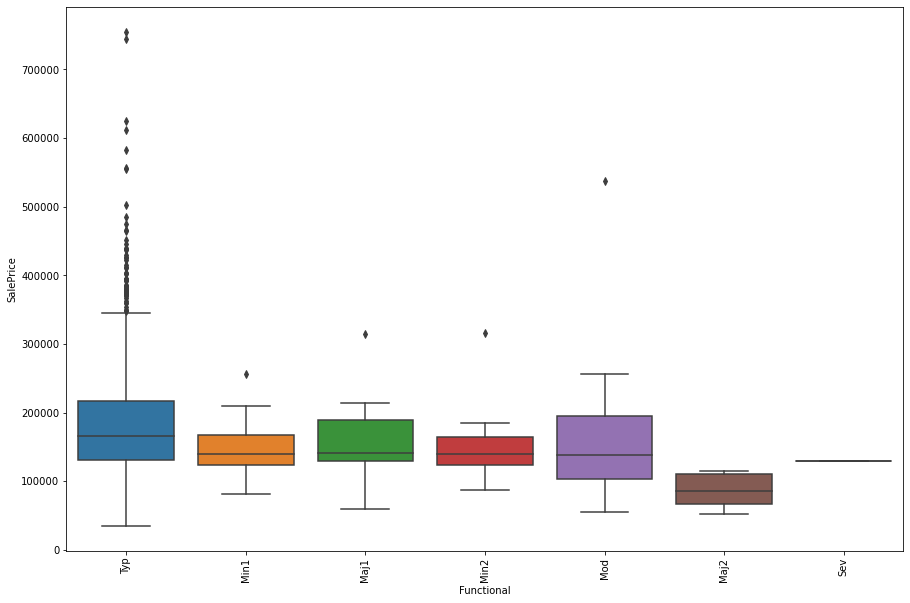

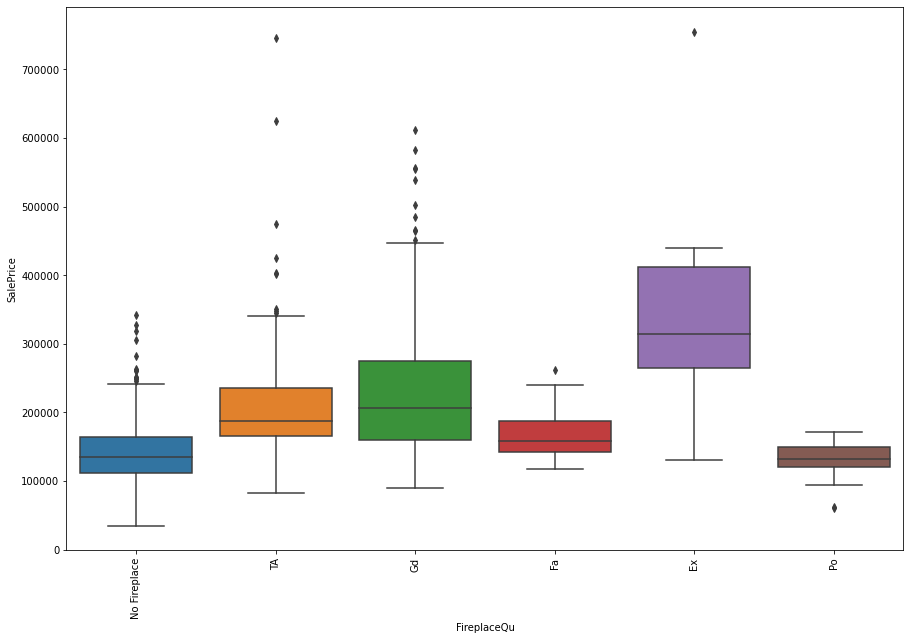

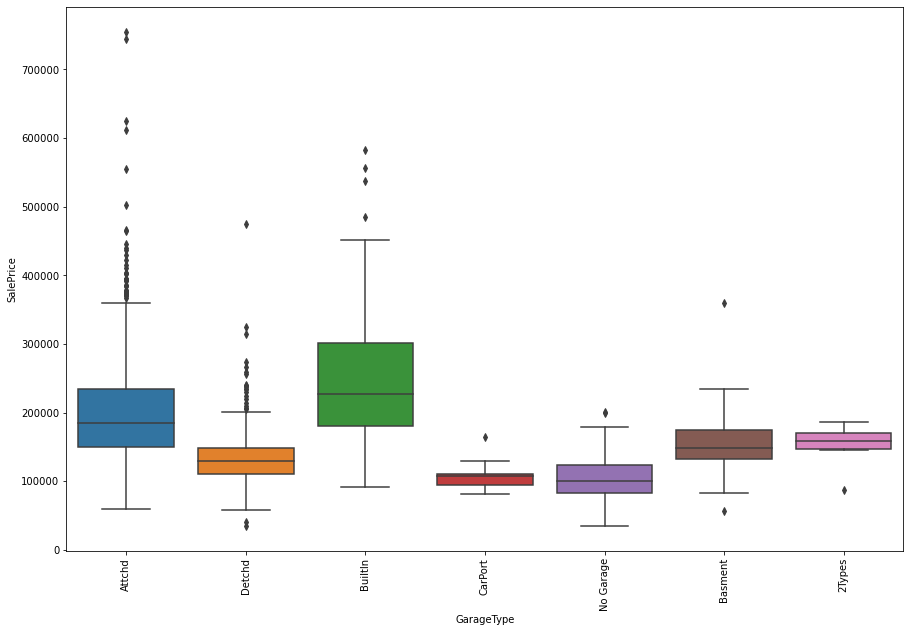

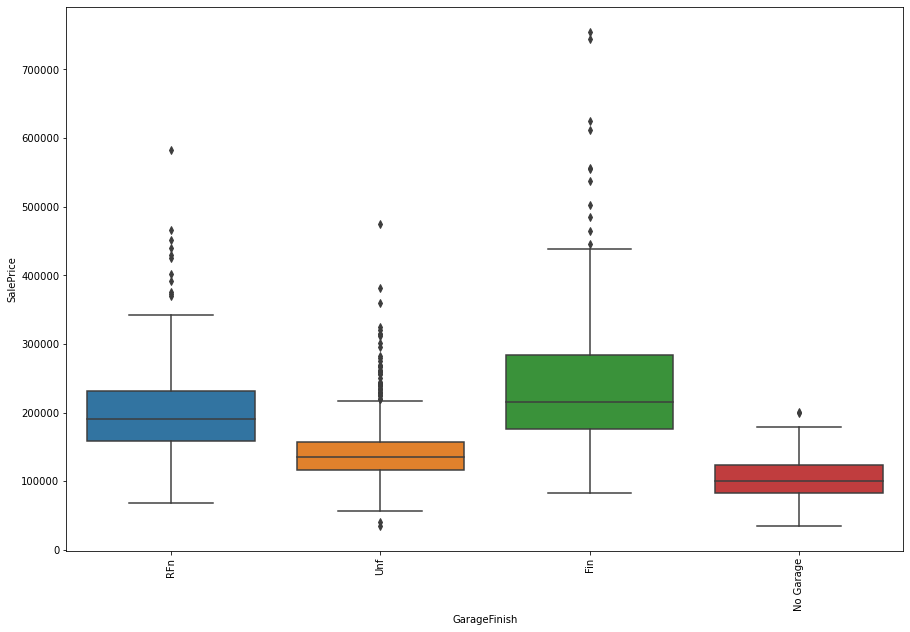

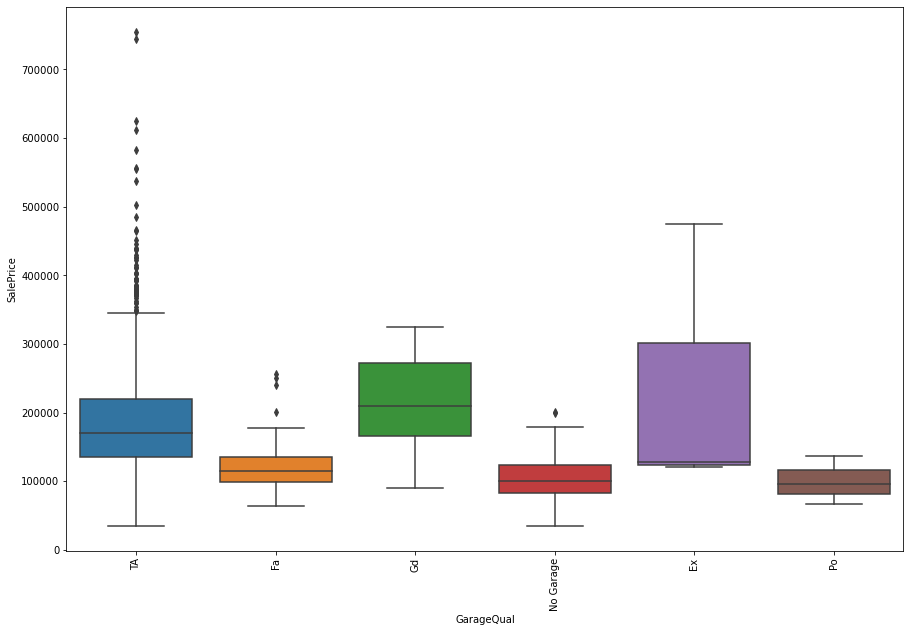

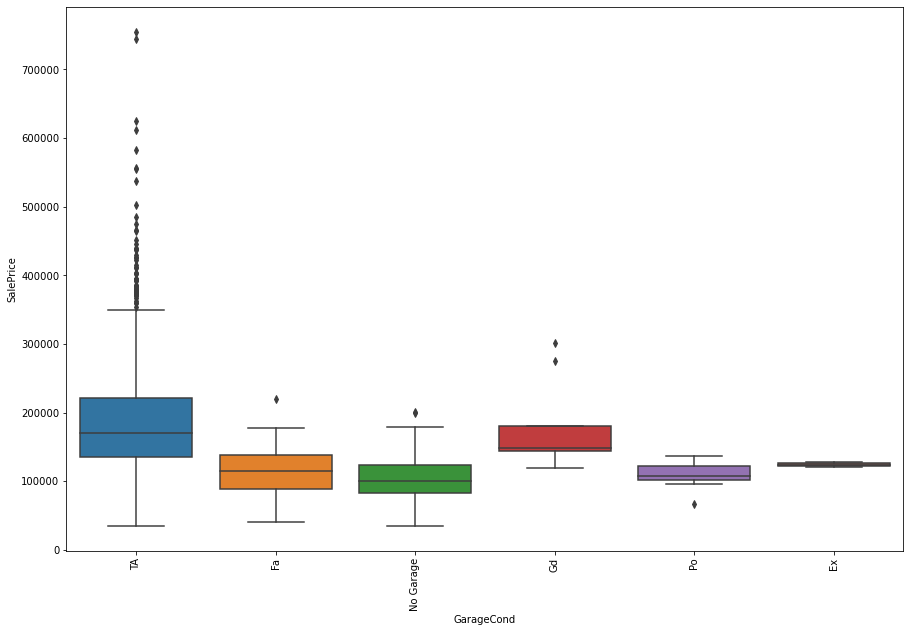

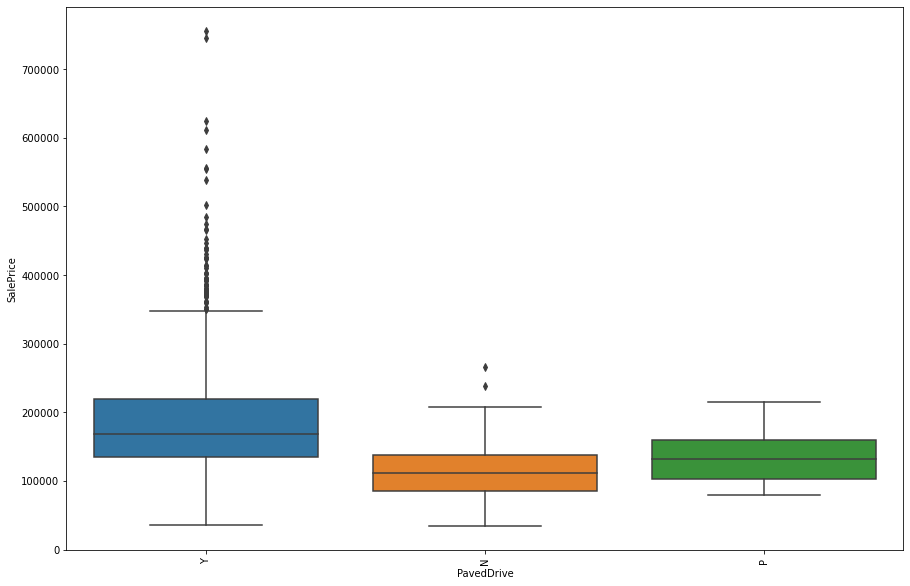

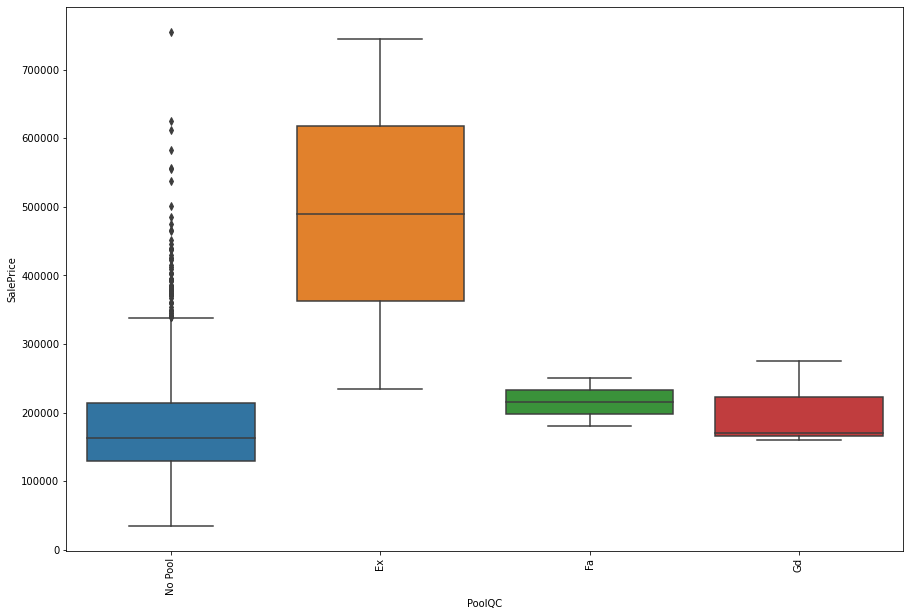

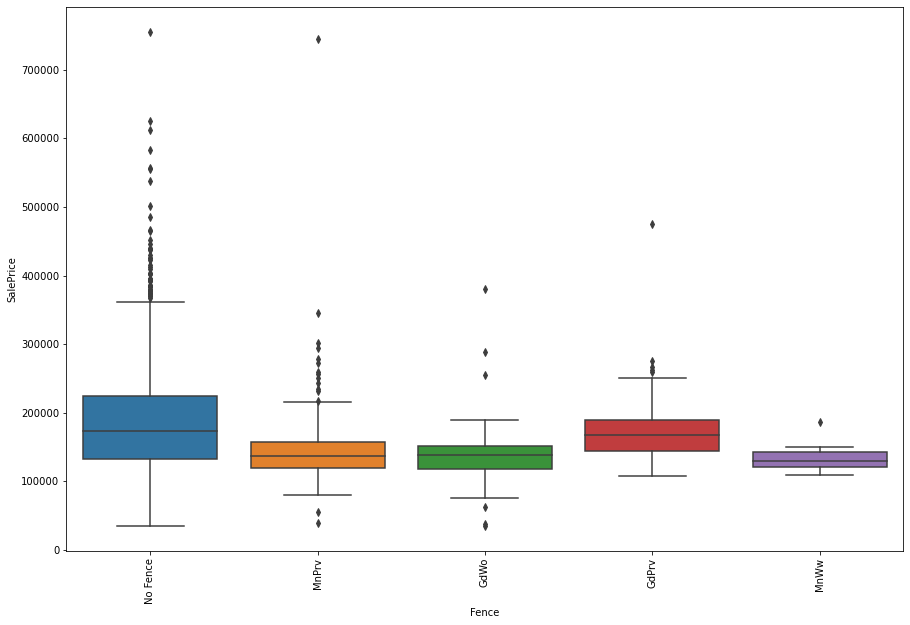

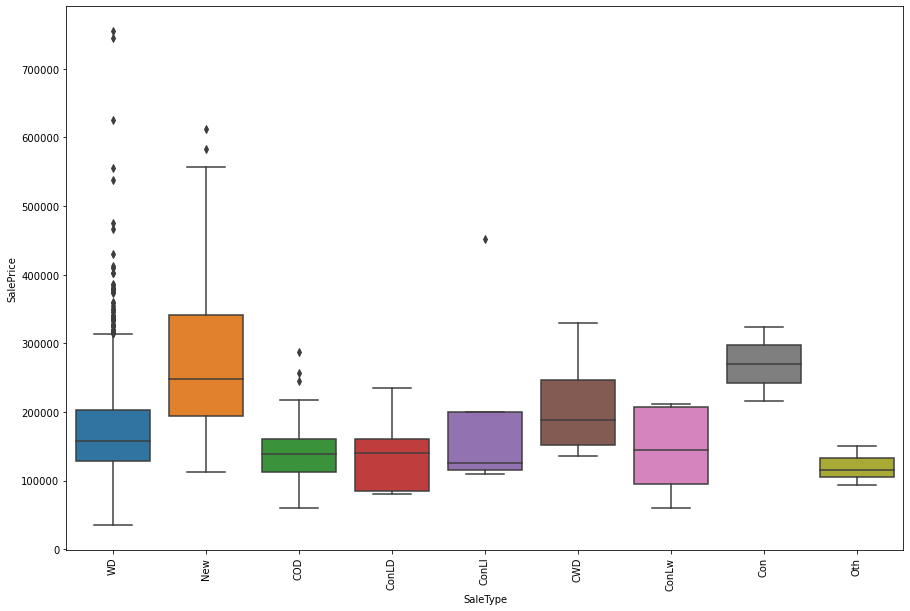

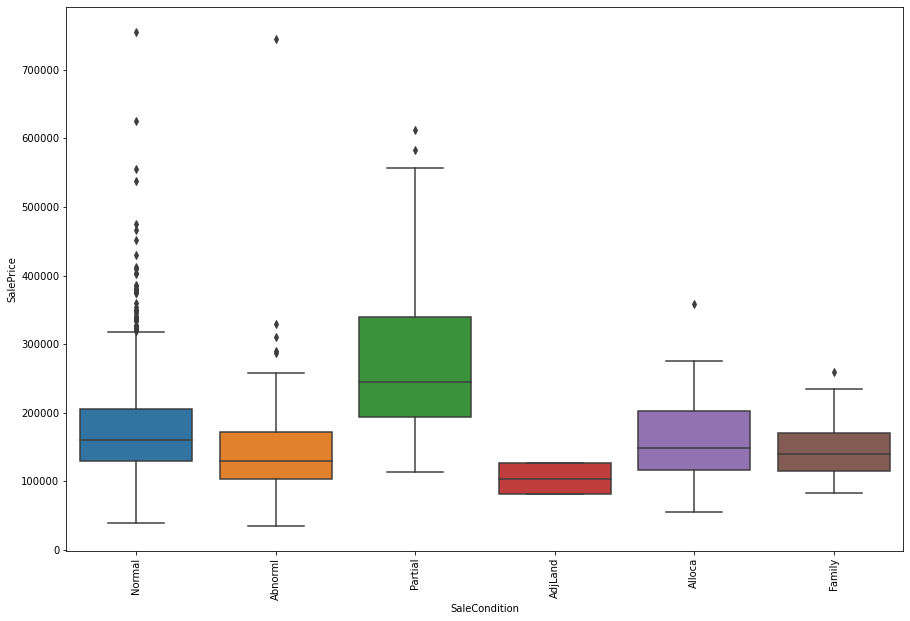

In [4821]:
# Using the estimator as median as there can be outliers in different input features of the dataset
for col in list(house_categorical.columns):
    plt.figure(figsize=(15, 10))
    sns.boxplot(x=col, y='SalePrice', data=house_df, order=house_df.groupby(col,sort=False)['SalePrice']
                .median().index)
    plt.xticks(rotation=90)
    plt.show()

#### Outlier detection and treatment

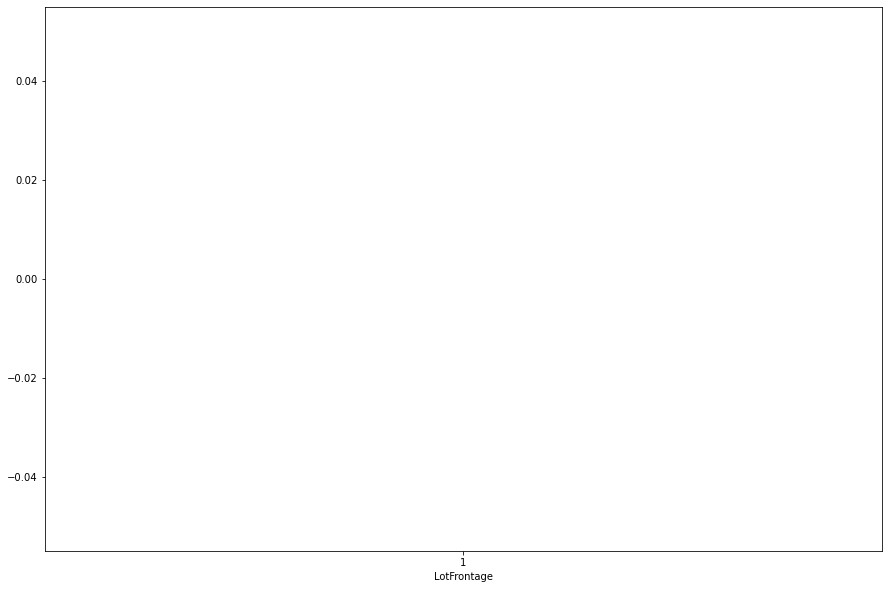

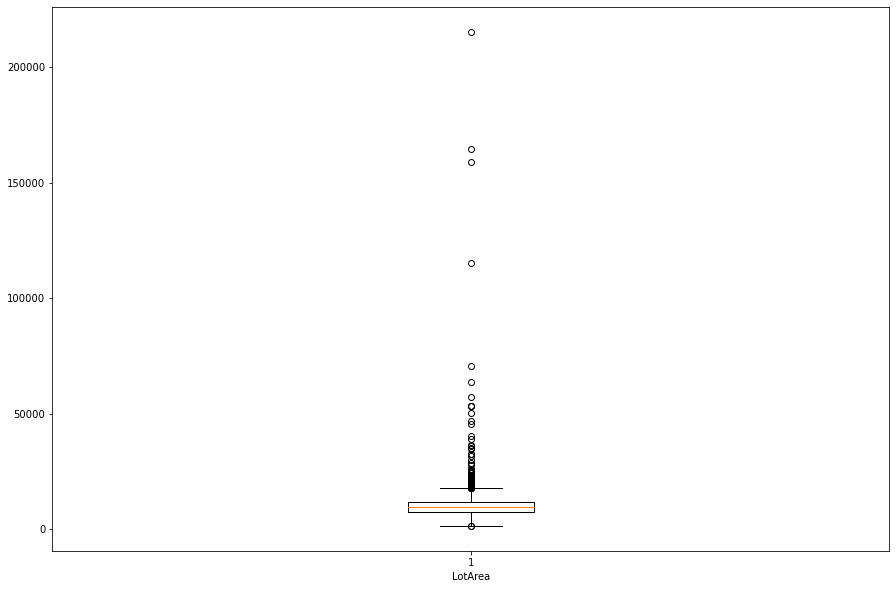

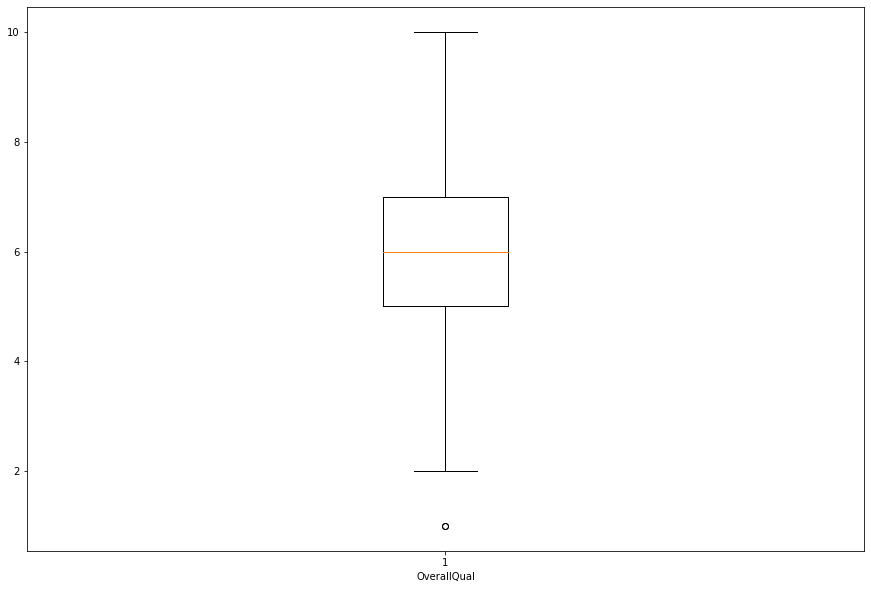

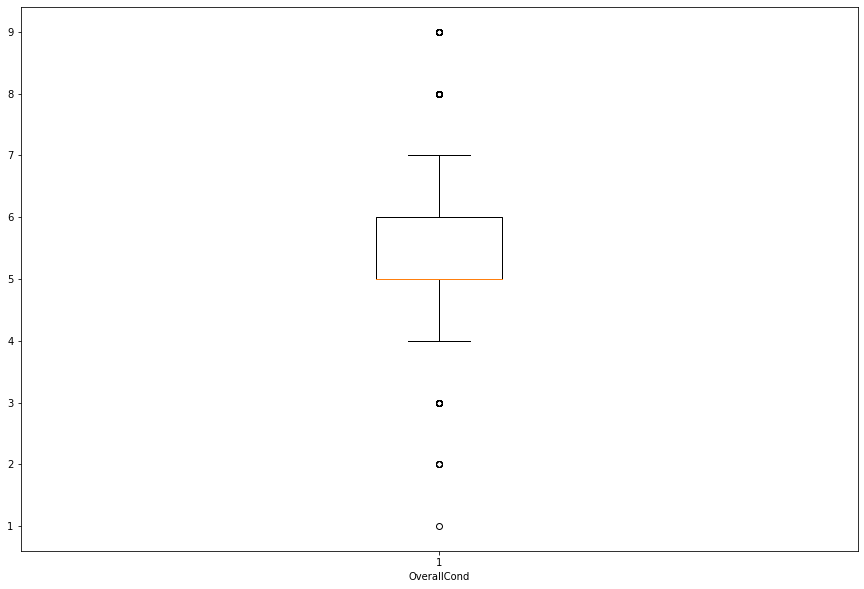

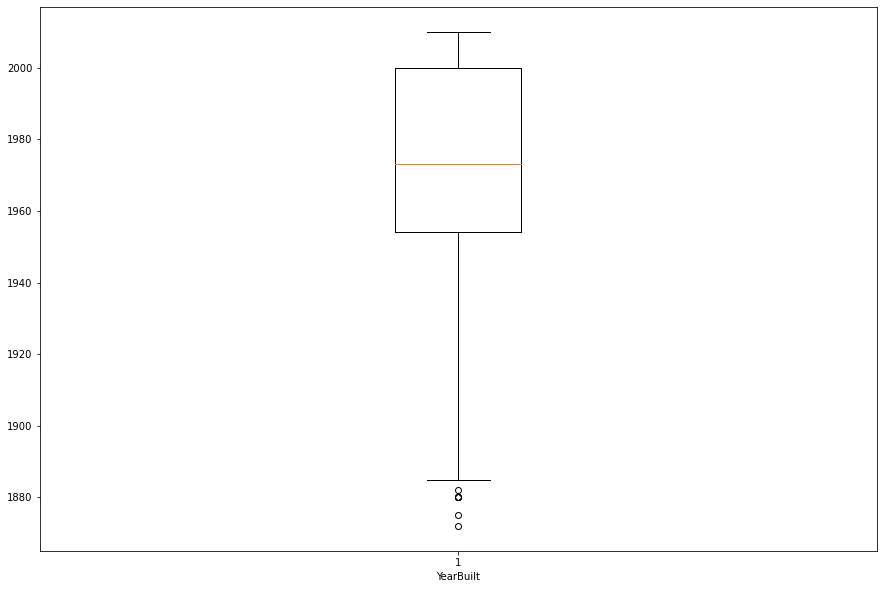

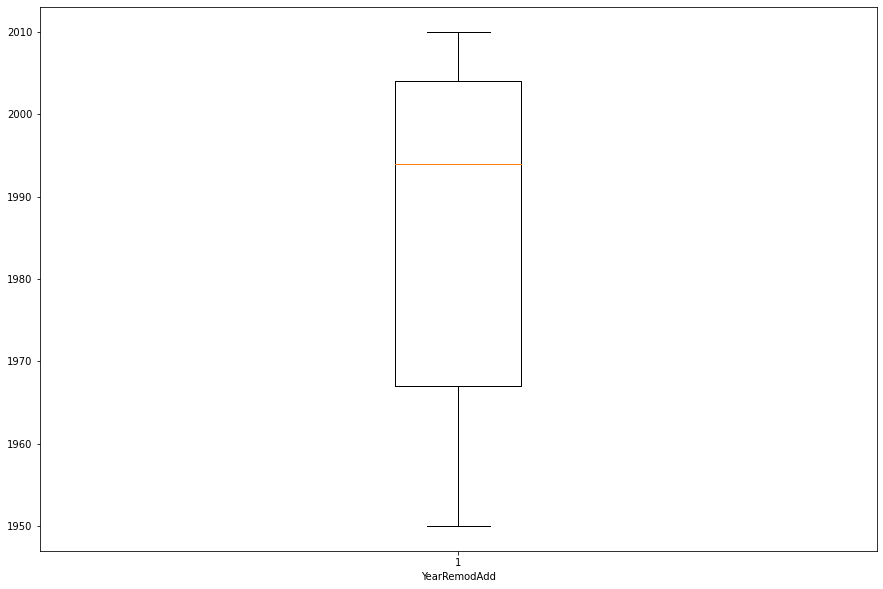

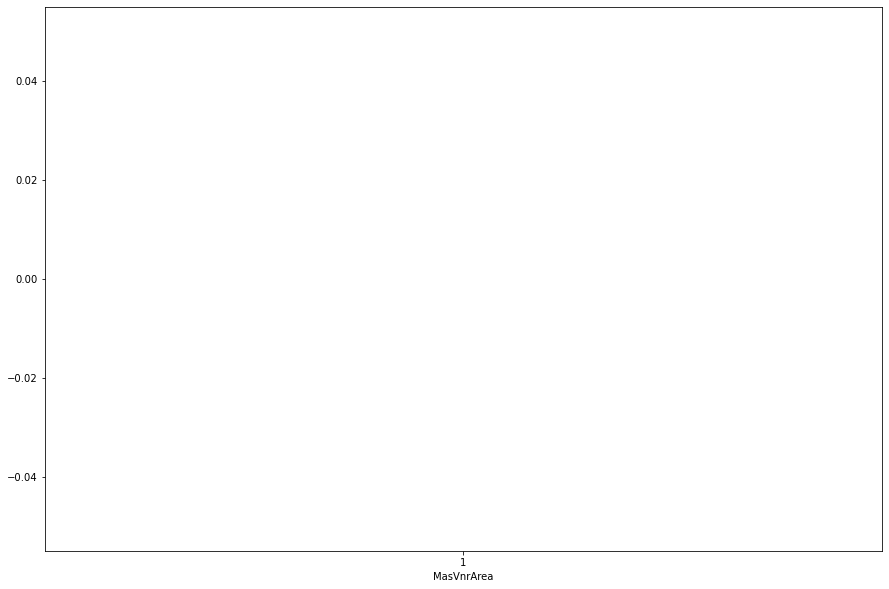

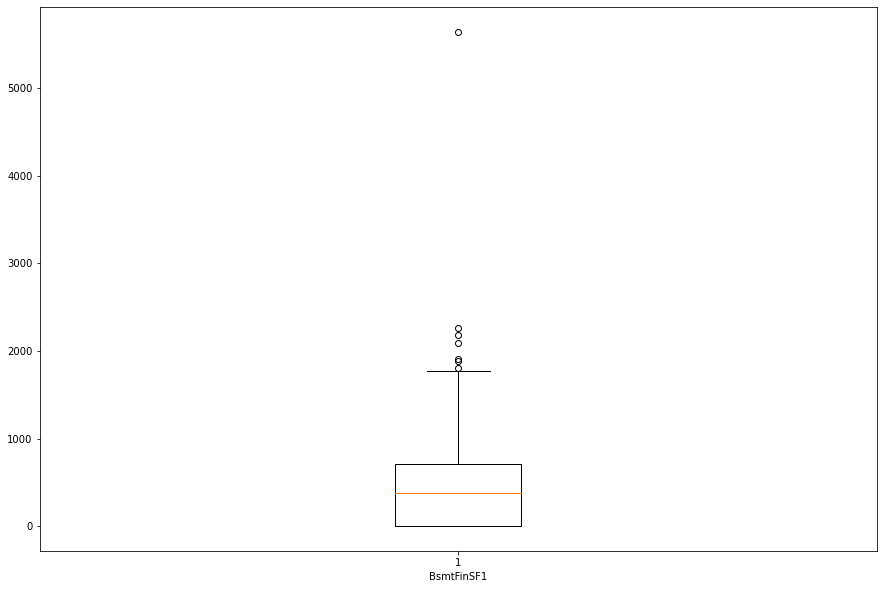

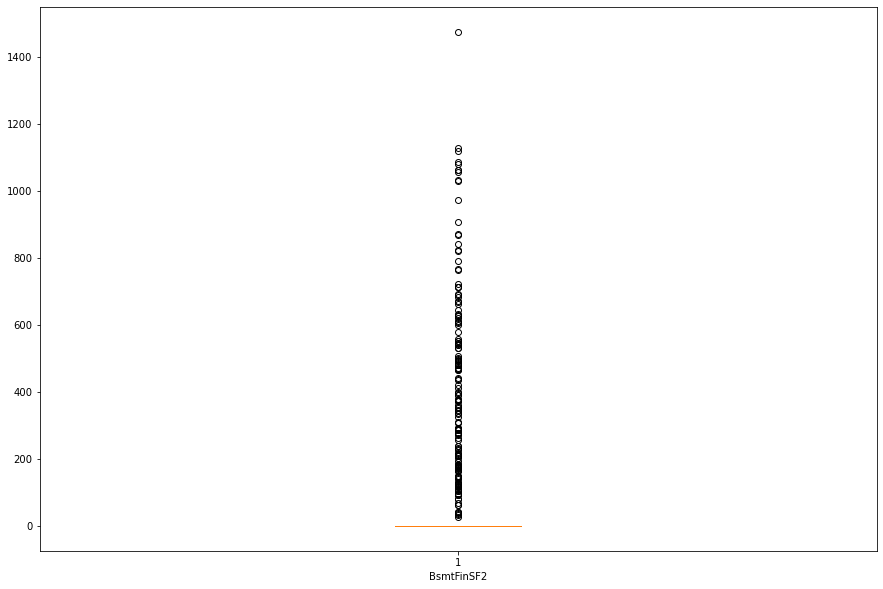

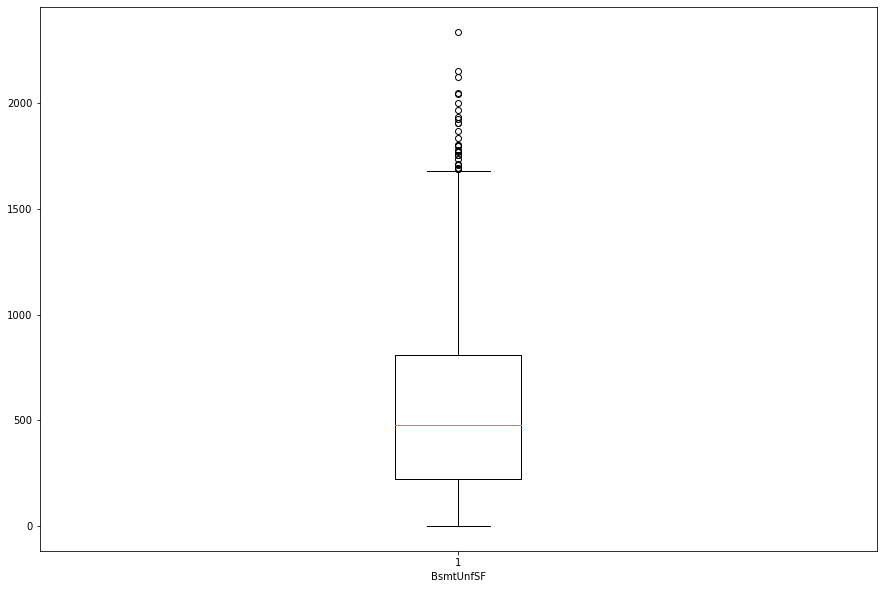

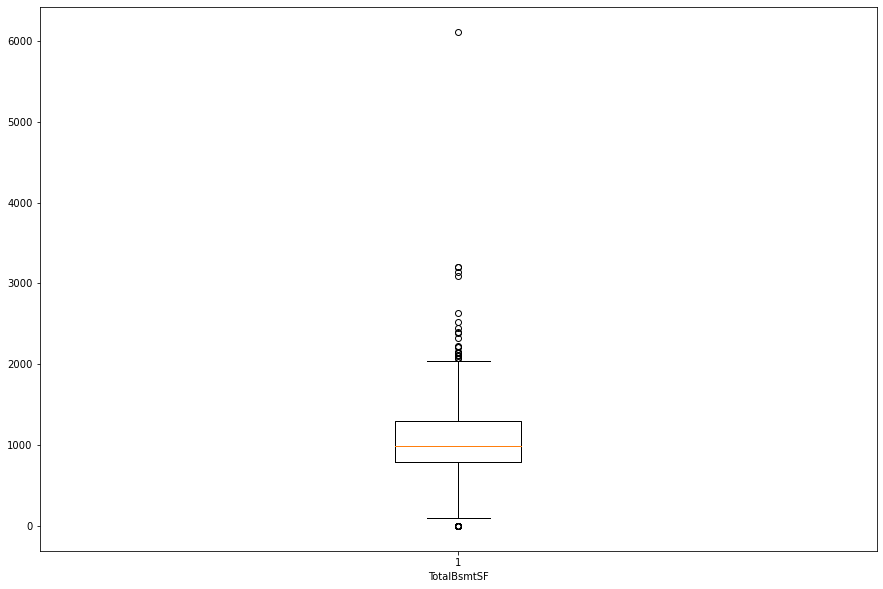

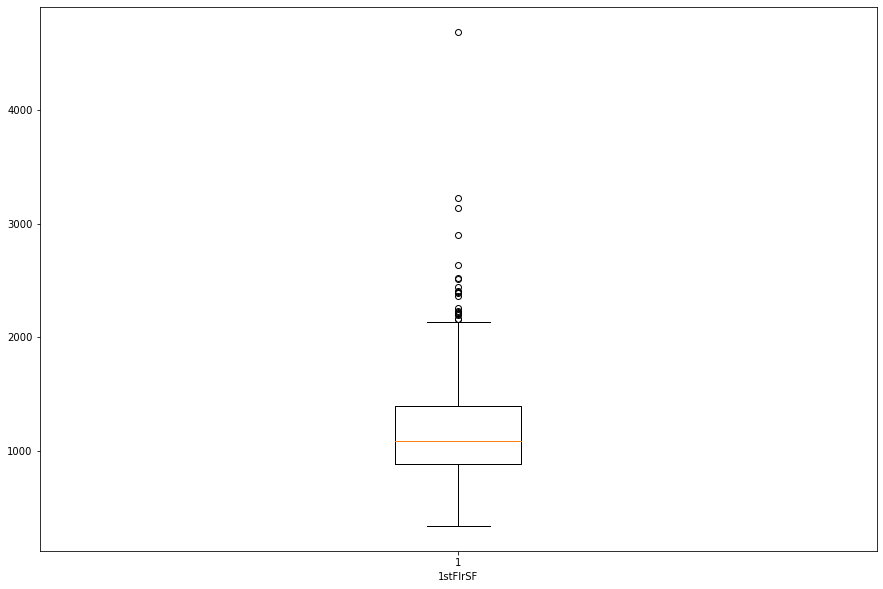

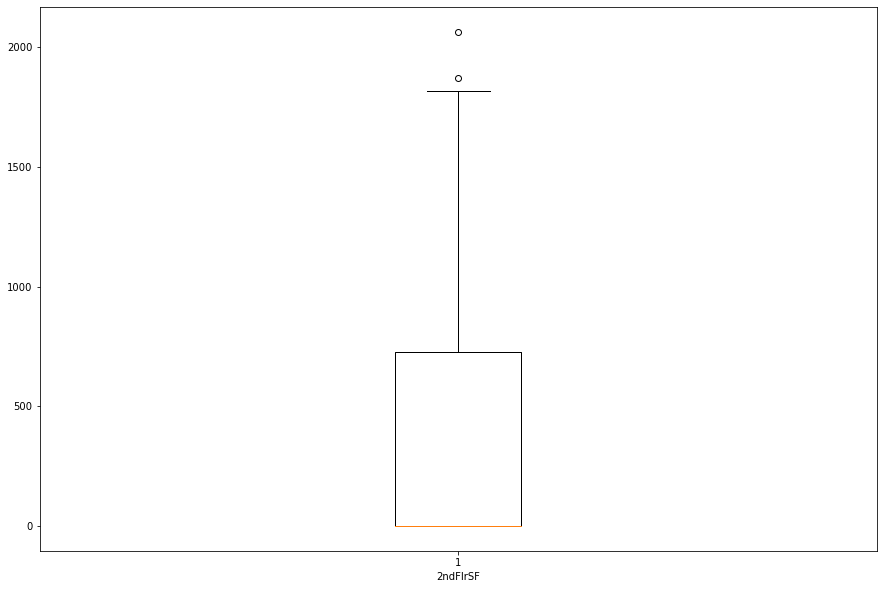

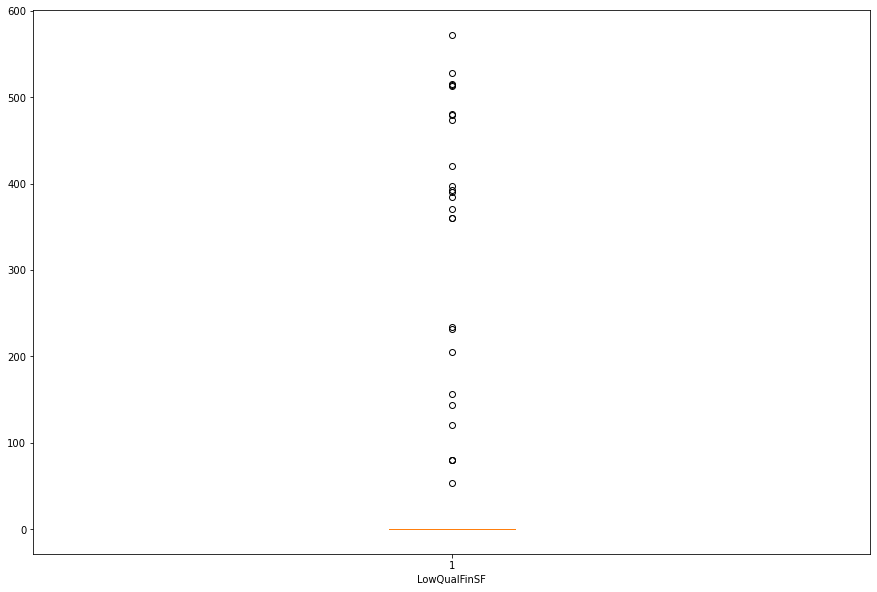

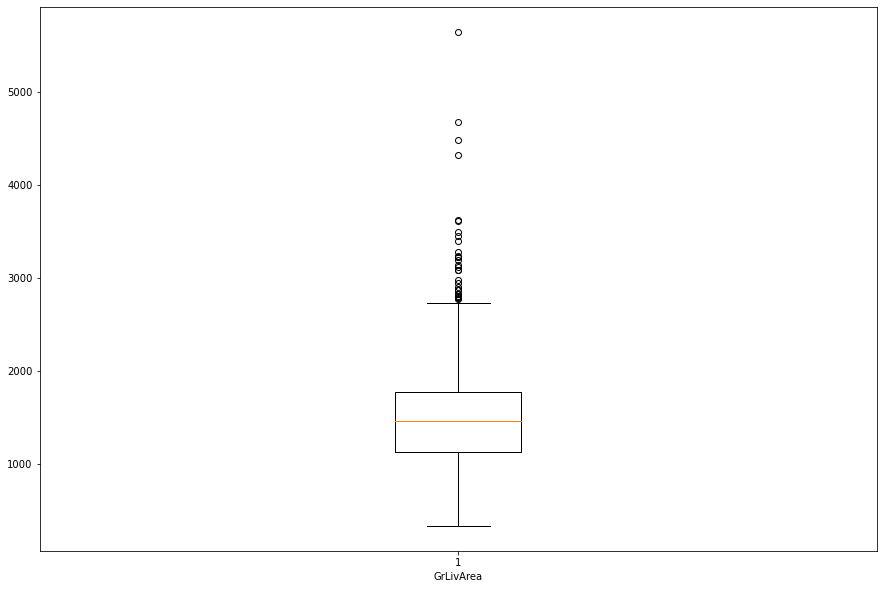

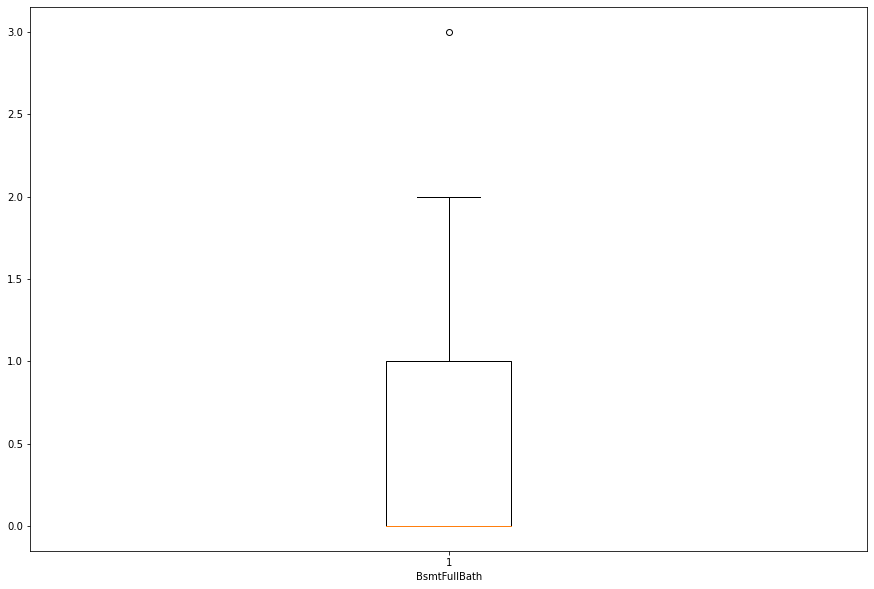

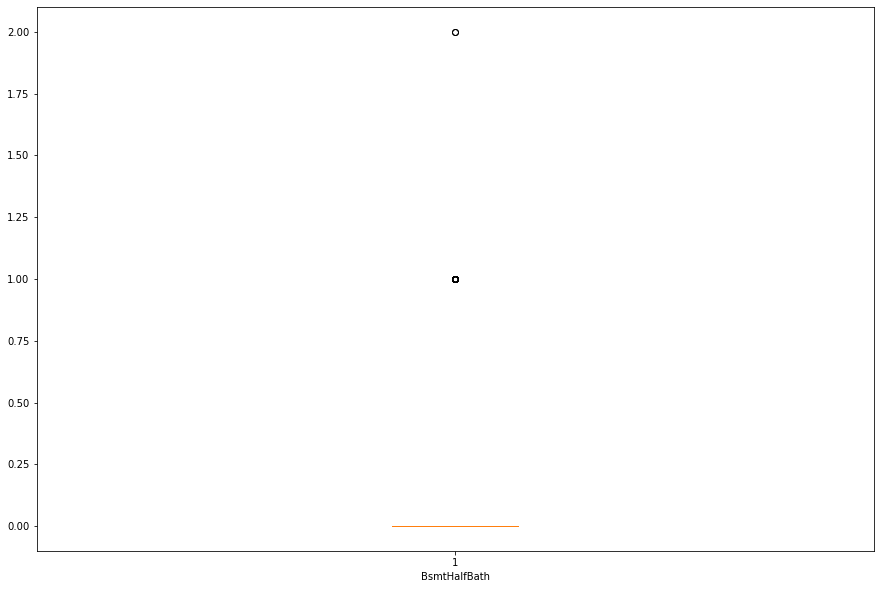

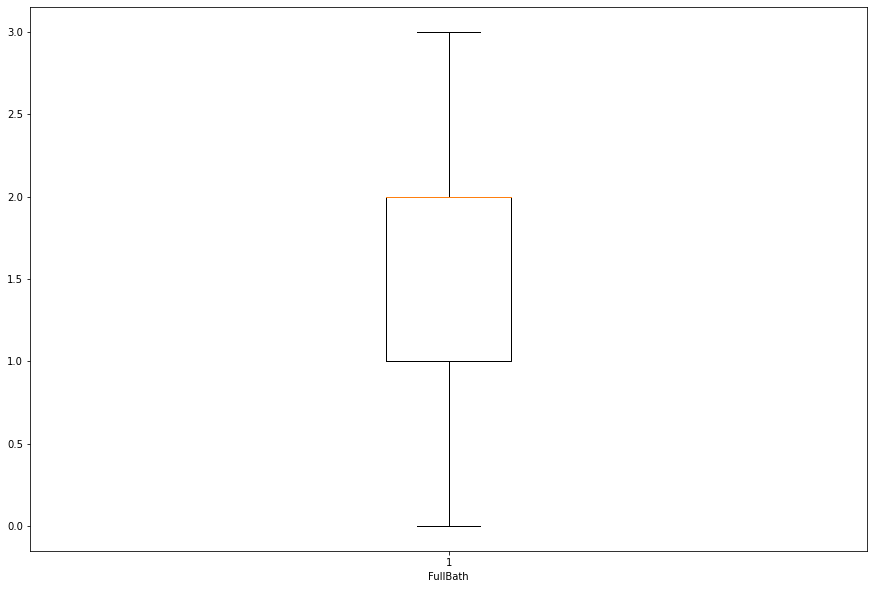

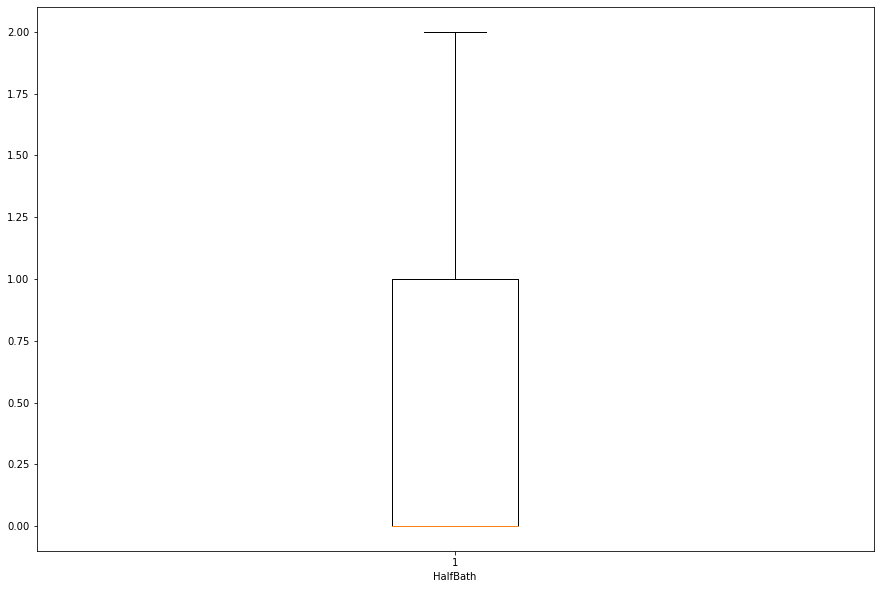

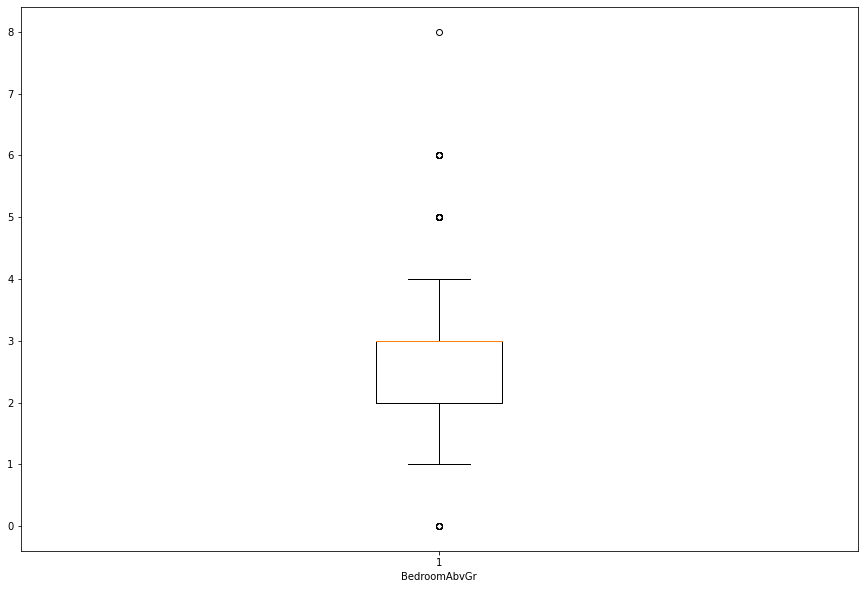

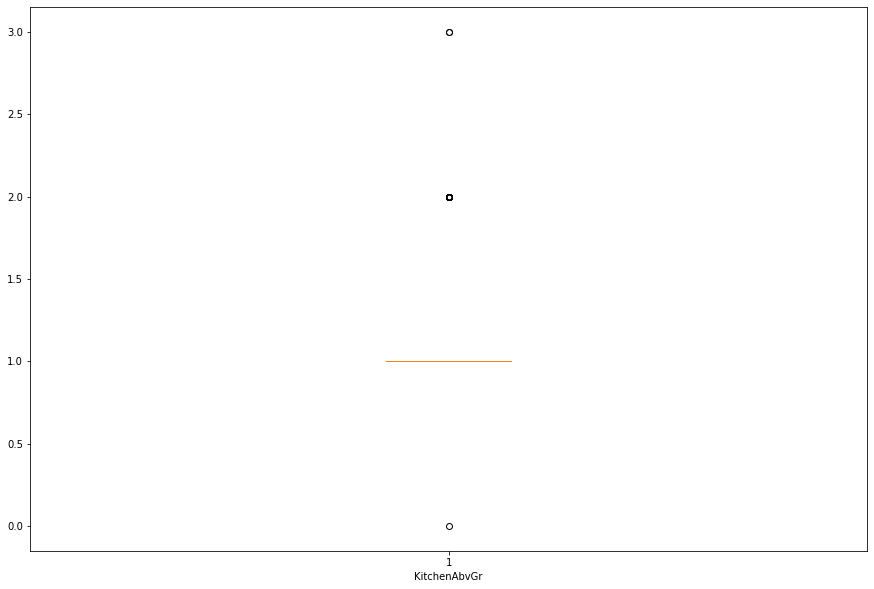

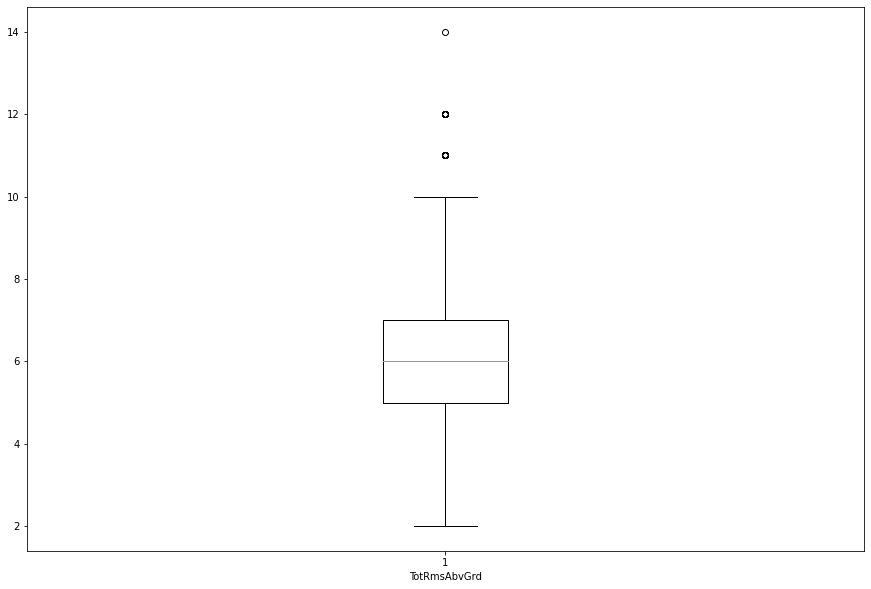

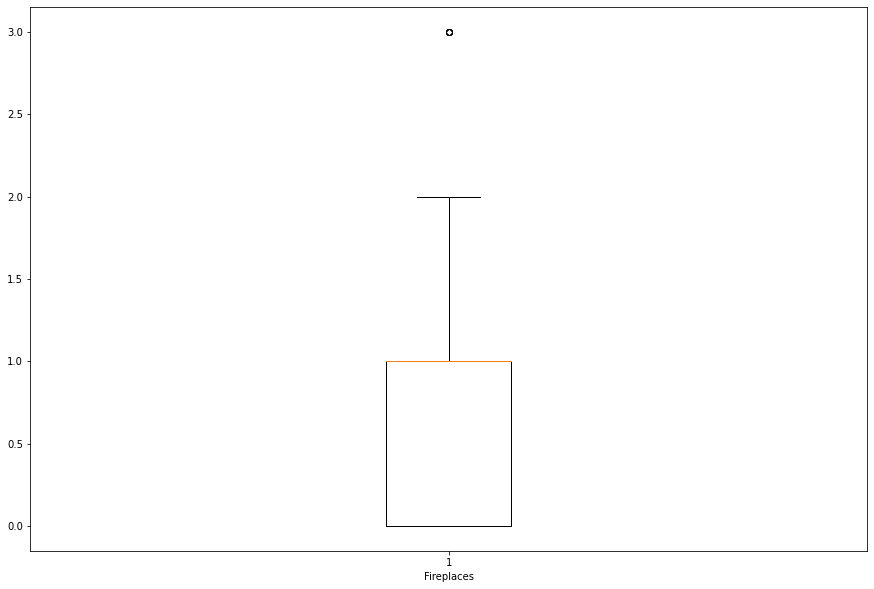

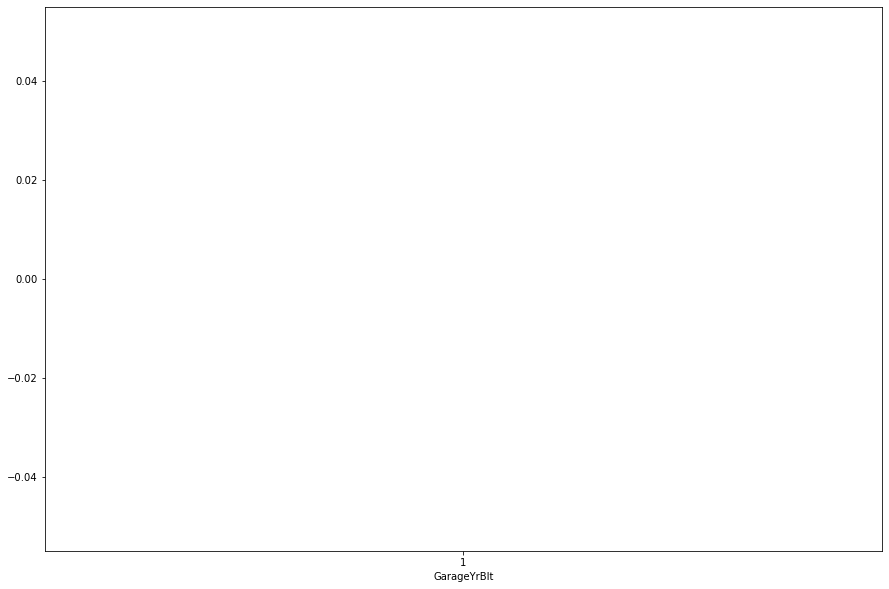

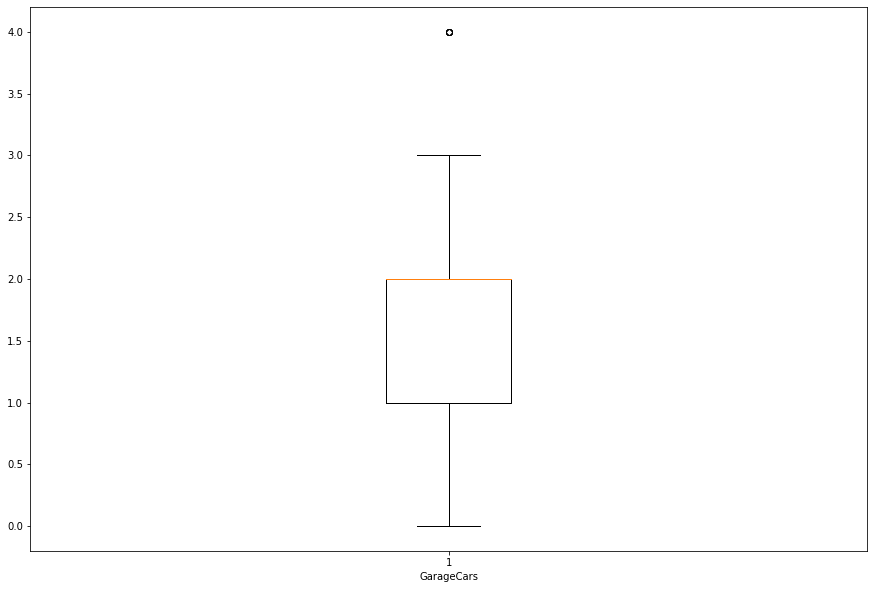

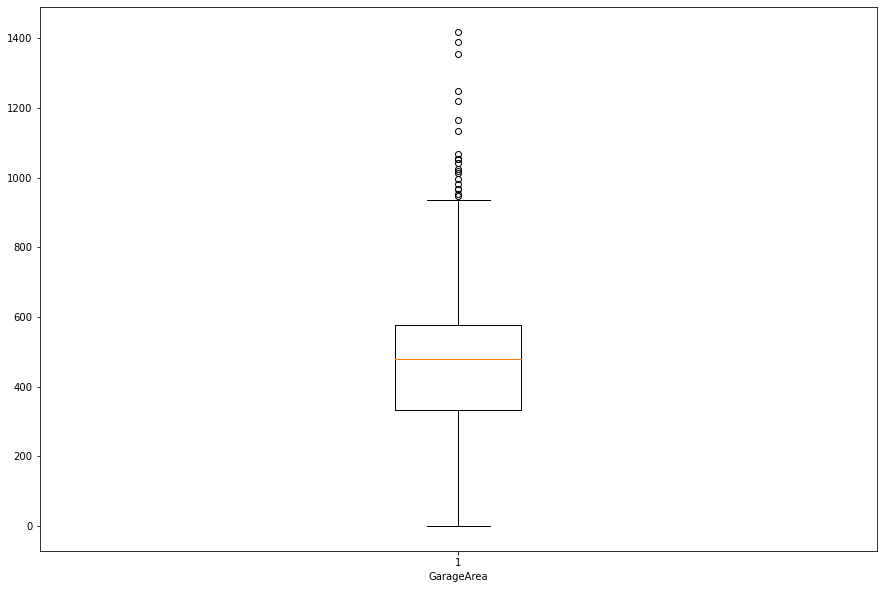

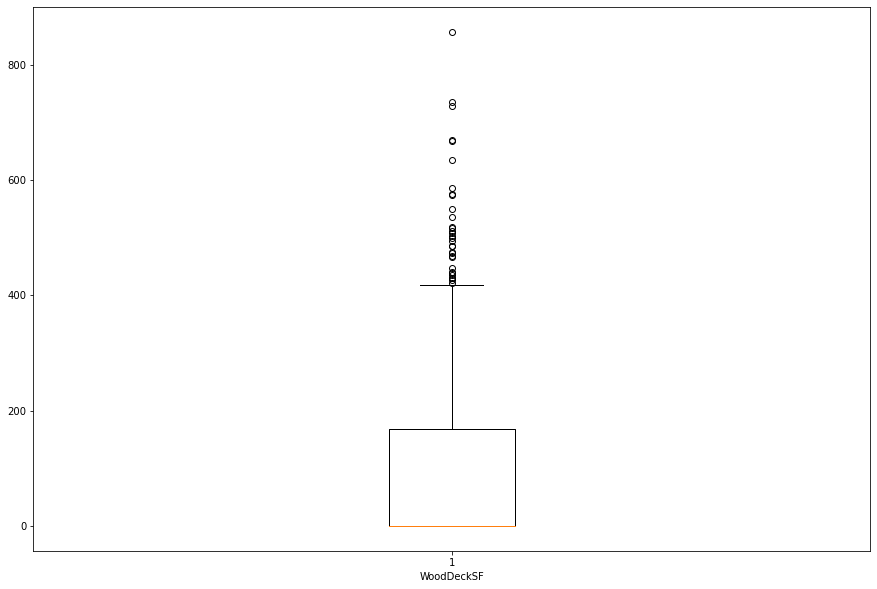

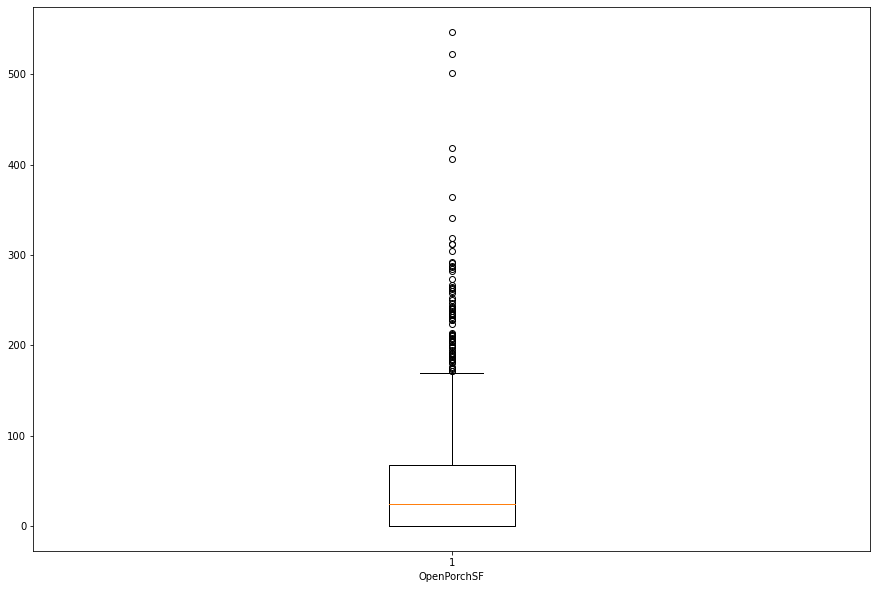

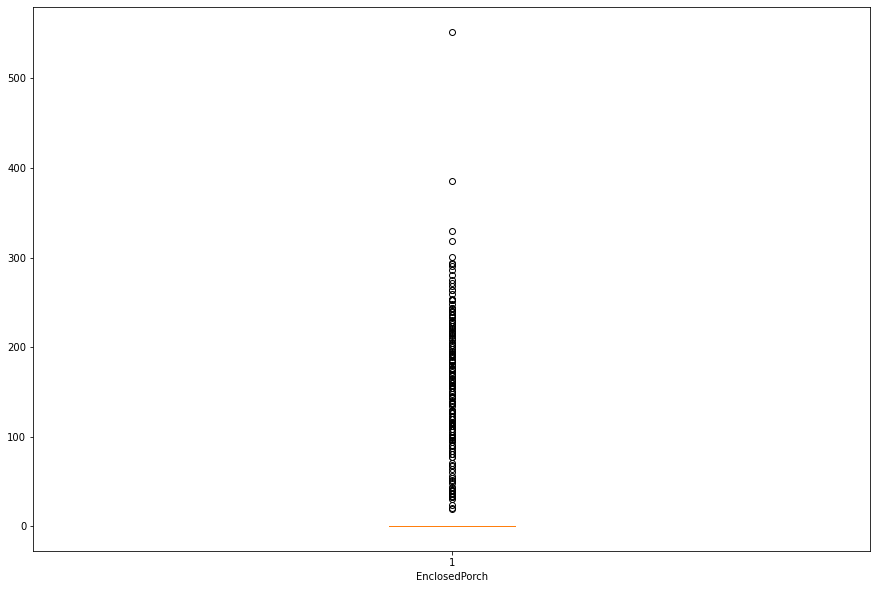

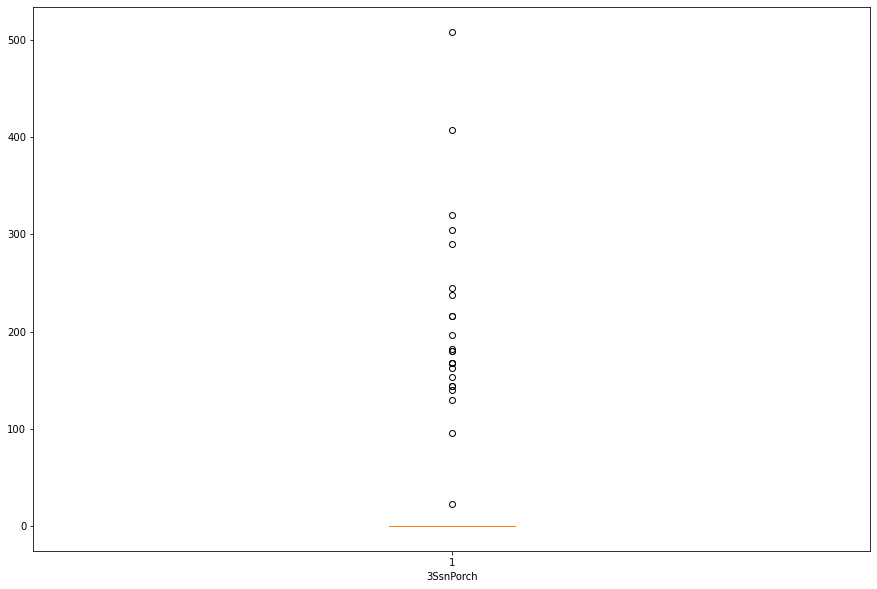

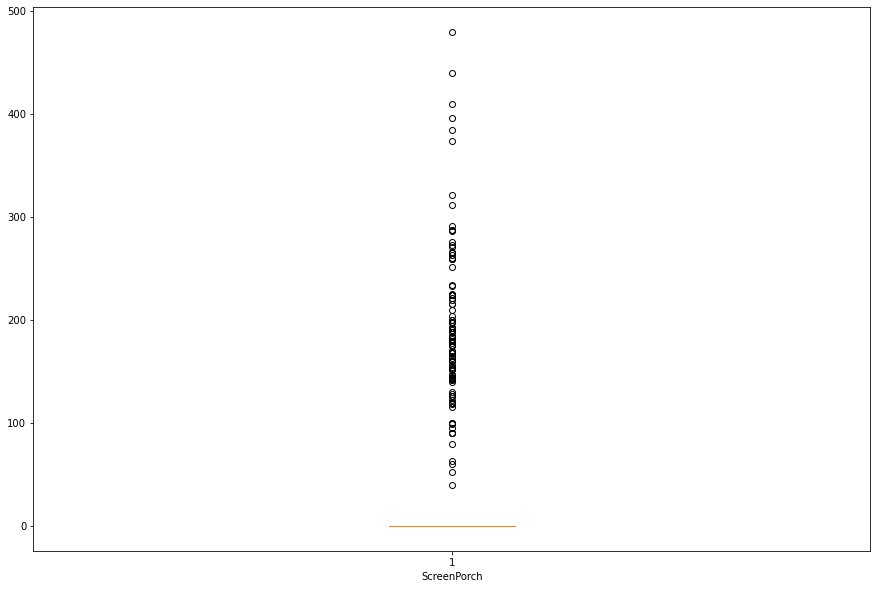

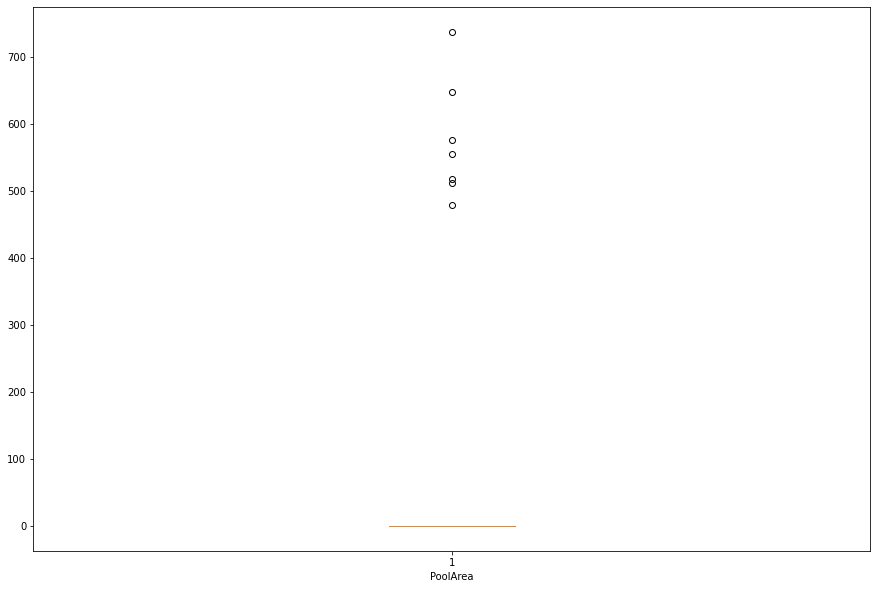

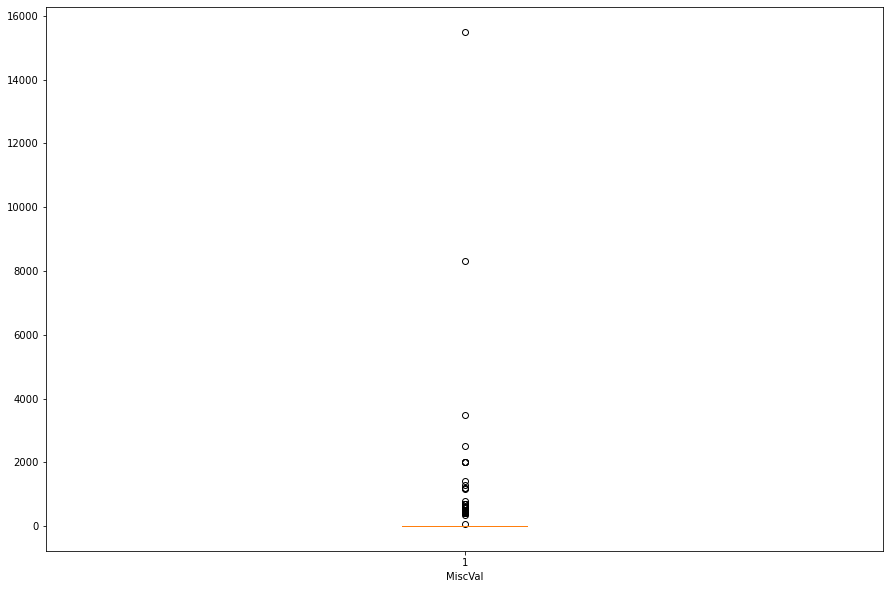

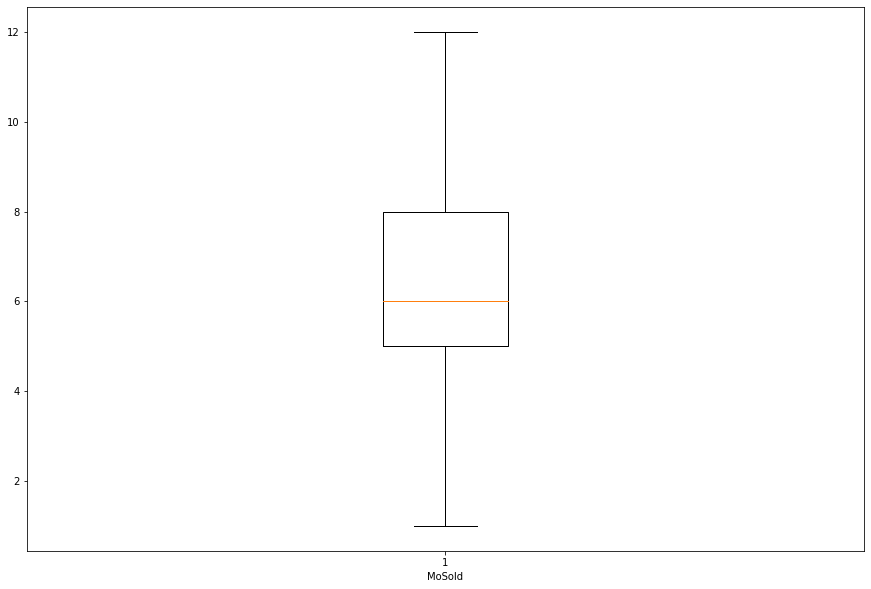

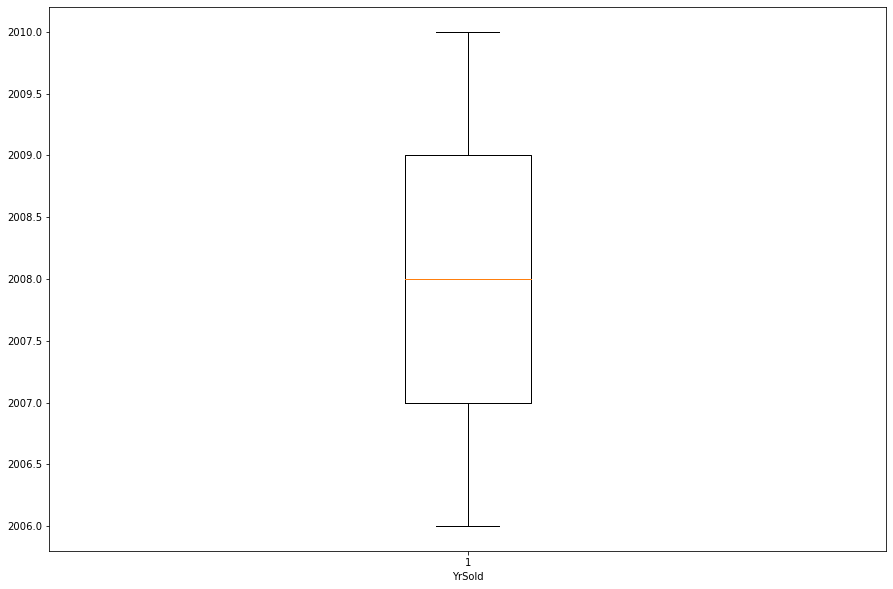

In [4822]:
for col in house_numeric_columns:
    plt.figure(figsize=(15, 10))
    plt.boxplot(house_df[col])
    plt.xlabel(col)
    plt.show()

In [4823]:
for col in house_numeric_columns:
    Q1 = house_df[col].quantile(.25)
    Q3 = house_df[col].quantile(.75)
    IQR = Q3 - Q1
    house_df = house_df[(house_df[col] >= (Q1 - (1.5 * IQR))) & house_df[col] <= (Q3 + (1.5 * IQR))]


In [4824]:
house_df.shape

(1244, 79)

In [4825]:
house_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      216
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

### Imputing Missing Values for feature columns Lot Frontage (Numerical), MasVnrType(Categorical), MasVnrArea(Numerical), GarageYrBlt, Electrical(Categorical)

#### Impute with mean if there are no outliers(numerical data). Impute with median if there are outliers(numerical data). Impute with mode for categorical data

In [4826]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1244 non-null   object 
 1   MSZoning       1244 non-null   object 
 2   LotFrontage    1028 non-null   float64
 3   LotArea        1244 non-null   int64  
 4   Street         1244 non-null   object 
 5   Alley          1244 non-null   object 
 6   LotShape       1244 non-null   object 
 7   LandContour    1244 non-null   object 
 8   Utilities      1244 non-null   object 
 9   LotConfig      1244 non-null   object 
 10  LandSlope      1244 non-null   object 
 11  Neighborhood   1244 non-null   object 
 12  Condition1     1244 non-null   object 
 13  Condition2     1244 non-null   object 
 14  BldgType       1244 non-null   object 
 15  HouseStyle     1244 non-null   object 
 16  OverallQual    1244 non-null   int64  
 17  OverallCond    1244 non-null   int64  
 18  YearBuil

In [4827]:
house_df.LotFrontage.isnull().sum()

216

In [4828]:
house_df.LotFrontage.describe()

count    1028.000000
mean       69.841440
std        24.520467
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

C:\Users\krish\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


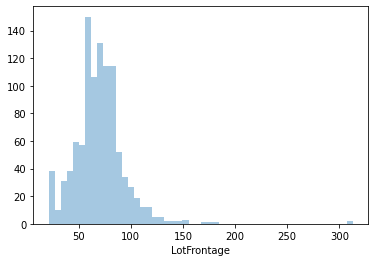

In [4829]:
sns.distplot(house_df.LotFrontage, kde=False)
plt.show()

#### After applying describe function on LotFrontage feature column, it is evident that there are outliers and hence imputing missing values with median 

In [4830]:
house_df.LotFrontage.fillna(house_df.LotFrontage.mean(), inplace=True)

In [4831]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2S_1946_N,RL,65.0,8450,Pave,No Access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,2,2008,WD,Normal,208500
2,2S_1946_N,RL,68.0,11250,Pave,No Access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,9,2008,WD,Normal,223500
3,2S_1945_O,RL,60.0,9550,Pave,No Access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,0,2,2006,WD,Abnorml,140000
4,2S_1946_N,RL,84.0,14260,Pave,No Access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,12,2008,WD,Normal,250000
5,1.5S_F,RL,85.0,14115,Pave,No Access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,700,10,2009,WD,Normal,143000


#### MasVnrType categorical column has 8 missing values. Imputing the missing values with mode of the column

In [4832]:
house_df.MasVnrType.isnull().sum()

8

In [4833]:
house_df.MasVnrType.value_counts()

None       727
BrkFace    379
Stone      120
BrkCmn      10
Name: MasVnrType, dtype: int64

In [4834]:
house_df.MasVnrType.fillna(house_df.MasVnrType.mode()[0], inplace=True)

In [4835]:
house_df.MasVnrType.value_counts()

None       735
BrkFace    379
Stone      120
BrkCmn      10
Name: MasVnrType, dtype: int64

#### After applying describe function on  MasVnrArea feature column, it is evident that there are outliers and hence imputing missing values with median 

In [4836]:
house_df.MasVnrArea.isnull().sum()

8

In [4837]:
house_df.MasVnrArea.describe()

count    1236.000000
mean      105.064725
std       182.843427
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [4838]:
house_df.MasVnrArea.fillna(house_df.MasVnrArea.median(), inplace=True)

#### Electrical is a categorical column which has one missing value. Imputing with mode 

In [4839]:
house_df.Electrical.isnull().sum()

1

In [4840]:
house_df.Electrical.fillna(house_df.Electrical.mode()[0], inplace=True)

In [4841]:
house_df.Electrical.isnull().sum()

0

In [4842]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1244 non-null   object 
 1   MSZoning       1244 non-null   object 
 2   LotFrontage    1244 non-null   float64
 3   LotArea        1244 non-null   int64  
 4   Street         1244 non-null   object 
 5   Alley          1244 non-null   object 
 6   LotShape       1244 non-null   object 
 7   LandContour    1244 non-null   object 
 8   Utilities      1244 non-null   object 
 9   LotConfig      1244 non-null   object 
 10  LandSlope      1244 non-null   object 
 11  Neighborhood   1244 non-null   object 
 12  Condition1     1244 non-null   object 
 13  Condition2     1244 non-null   object 
 14  BldgType       1244 non-null   object 
 15  HouseStyle     1244 non-null   object 
 16  OverallQual    1244 non-null   int64  
 17  OverallCond    1244 non-null   int64  
 18  YearBuil

#### GarageYrBlt is a categorical column which has missing values. Imputing with mode 

In [4843]:
house_df.GarageYrBlt.fillna(house_df.GarageYrBlt.mode()[0], inplace=True)

In [4844]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1244 non-null   object 
 1   MSZoning       1244 non-null   object 
 2   LotFrontage    1244 non-null   float64
 3   LotArea        1244 non-null   int64  
 4   Street         1244 non-null   object 
 5   Alley          1244 non-null   object 
 6   LotShape       1244 non-null   object 
 7   LandContour    1244 non-null   object 
 8   Utilities      1244 non-null   object 
 9   LotConfig      1244 non-null   object 
 10  LandSlope      1244 non-null   object 
 11  Neighborhood   1244 non-null   object 
 12  Condition1     1244 non-null   object 
 13  Condition2     1244 non-null   object 
 14  BldgType       1244 non-null   object 
 15  HouseStyle     1244 non-null   object 
 16  OverallQual    1244 non-null   int64  
 17  OverallCond    1244 non-null   int64  
 18  YearBuil

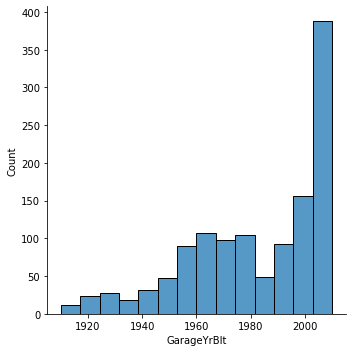

In [4845]:
sns.displot(house_df['GarageYrBlt'])
plt.show()

#### Checking if Condition1 and Condition2 columns are exactly same for all the entries in the dataset

In [4846]:
house_df['Condition1'].equals(house_df['Condition2'])

False

#### Checking if Exterior1st and Exterior2nd columns are exactly same for all the entries in the dataset

In [4847]:
house_df['Exterior1st'].equals(house_df['Exterior2nd'])

False

#### Checking if  BsmtFinSF1 and BsmtFinSF2 columns are exactly same for all the entries in the dataset

In [4848]:
house_df['BsmtFinSF1'].equals(house_df['BsmtFinSF2'])

False

In [4849]:
# correlation matrix
cor = house_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


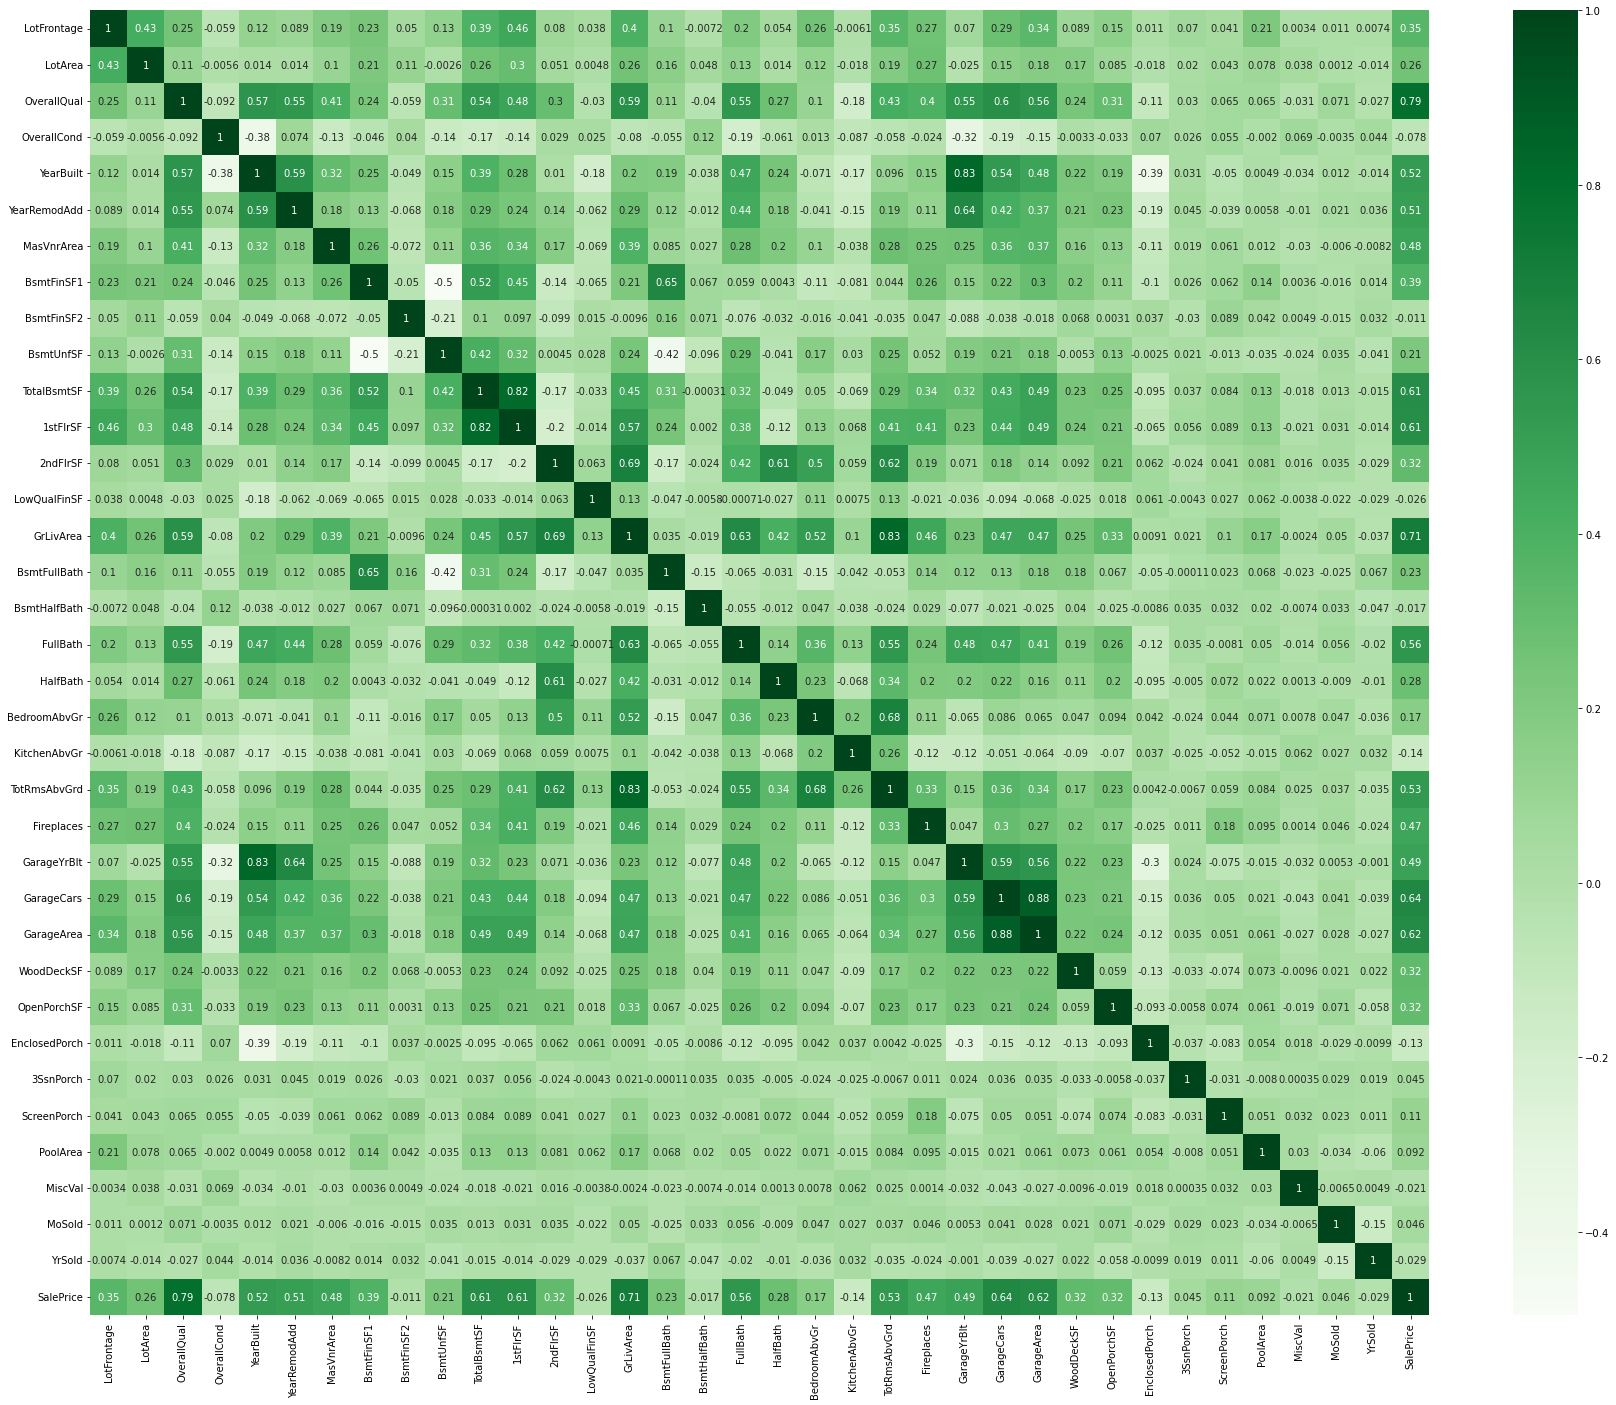

In [4850]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,24))

# heatmap
sns.heatmap(cor, cmap="Greens", annot=True)
plt.show()


In [4851]:
house_numeric.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Derived Variables

In [4852]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def Buildingage(record):
    return record['YrSold'] - record['YearBuilt']
       
house_df['BuildingAge'] = house_df.apply(Buildingage, axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuildingAge
0,2S_1946_N,RL,65.0,8450,Pave,No Access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,0,2,2008,WD,Normal,208500,5
2,2S_1946_N,RL,68.0,11250,Pave,No Access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,0,9,2008,WD,Normal,223500,7
3,2S_1945_O,RL,60.0,9550,Pave,No Access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,0,2,2006,WD,Abnorml,140000,91
4,2S_1946_N,RL,84.0,14260,Pave,No Access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,0,12,2008,WD,Normal,250000,8
5,1.5S_F,RL,85.0,14115,Pave,No Access,IR1,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,700,10,2009,WD,Normal,143000,16


In [4853]:
def remodelage(record):
    return record['YrSold'] - record['YearRemodAdd']
       
house_df['RemodelAge'] = house_df.apply(remodelage, axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuildingAge,RemodelAge
0,2S_1946_N,RL,65.0,8450,Pave,No Access,Reg,Lvl,AllPub,Inside,...,No Pool,No Fence,0,2,2008,WD,Normal,208500,5,5
2,2S_1946_N,RL,68.0,11250,Pave,No Access,IR1,Lvl,AllPub,Inside,...,No Pool,No Fence,0,9,2008,WD,Normal,223500,7,6
3,2S_1945_O,RL,60.0,9550,Pave,No Access,IR1,Lvl,AllPub,Corner,...,No Pool,No Fence,0,2,2006,WD,Abnorml,140000,91,36
4,2S_1946_N,RL,84.0,14260,Pave,No Access,IR1,Lvl,AllPub,FR2,...,No Pool,No Fence,0,12,2008,WD,Normal,250000,8,8
5,1.5S_F,RL,85.0,14115,Pave,No Access,IR1,Lvl,AllPub,Inside,...,No Pool,MnPrv,700,10,2009,WD,Normal,143000,16,14


In [4854]:
def GarageAge(record):
    return record['YrSold'] - record['GarageYrBlt']
       
house_df['GarageAge'] = house_df.apply(GarageAge, axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuildingAge,RemodelAge,GarageAge
0,2S_1946_N,RL,65.0,8450,Pave,No Access,Reg,Lvl,AllPub,Inside,...,No Fence,0,2,2008,WD,Normal,208500,5,5,5.0
2,2S_1946_N,RL,68.0,11250,Pave,No Access,IR1,Lvl,AllPub,Inside,...,No Fence,0,9,2008,WD,Normal,223500,7,6,7.0
3,2S_1945_O,RL,60.0,9550,Pave,No Access,IR1,Lvl,AllPub,Corner,...,No Fence,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,2S_1946_N,RL,84.0,14260,Pave,No Access,IR1,Lvl,AllPub,FR2,...,No Fence,0,12,2008,WD,Normal,250000,8,8,8.0
5,1.5S_F,RL,85.0,14115,Pave,No Access,IR1,Lvl,AllPub,Inside,...,MnPrv,700,10,2009,WD,Normal,143000,16,14,16.0


In [4855]:
house_df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace=True, axis=1)

In [4856]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_df[house_categorical.columns], drop_first=True)
house_dummies.shape

(1244, 223)

In [4857]:
house_df.shape

(1244, 78)

In [4858]:
# drop categorical variables 
house_df = house_df.drop(list(house_categorical.columns), axis=1)

In [4859]:
house_df.shape

(1244, 35)

In [4860]:
house_dummies.shape

(1244, 223)

In [4861]:
# concat dummy variables with house_df
house_df = pd.concat([house_df, house_dummies], axis=1)

In [4862]:
house_df.shape

(1244, 258)

C:\Users\krish\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


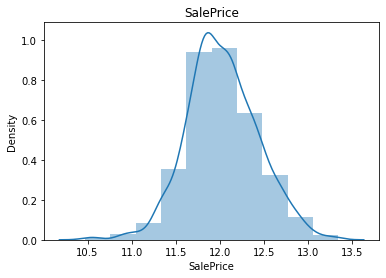

In [4863]:
# transform the sales price

house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_df['SalePrice'], bins=10)
plt.show()

### Building Linear Regression Model using Scikit Learn

#### Split the data into train and test sets

In [4942]:
# split into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(house_df, train_size=0.7, random_state=100)

In [4943]:
'SalePrice' in df_test.columns

True

#### Applying Standard scaler on numeric columns in housing data set

In [4944]:
from sklearn.preprocessing import StandardScaler

In [4945]:
scaler = StandardScaler()

In [4946]:
# all numeric (float and int) variables in the dataset
house_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,BuildingAge,RemodelAge,GarageAge
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,0,2,12.247699,5,5,5.0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,0,9,12.317171,7,6,7.0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,272,0,0,0,0,2,11.849405,91,36,8.0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,0,12,12.429220,8,8,8.0
5,85.0,14115,5,5,0.0,732,0,64,796,796,...,0,320,0,0,700,10,11.870607,16,14,16.0


In [4947]:
num_vars = list(house_numeric.columns)
num_vars.remove('SalePrice')

In [4948]:
print(num_vars)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'BuildingAge', 'RemodelAge', 'GarageAge']


In [4949]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [4950]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [4951]:
# Do an RFE to minimise the features
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [4956]:
from sklearn.metrics import r2_score, mean_squared_error

In [4957]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [4958]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [4959]:
#X_test_rfe = X_test[rfe_lr_col]

In [4960]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
#y_pred_train = lm.predict(X_train_rfe)
#y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8737906256335282
-2.526510385128659e+20
17.347989475533332
1.6457771223889297e+22
0.019940217787969346
4.400473589275213e+19


C:\Users\krish\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Train data Errors')

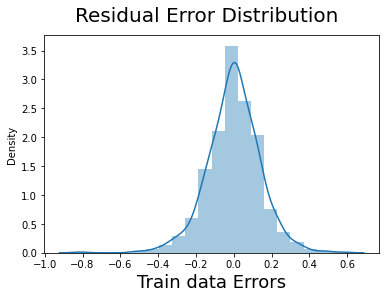

In [4961]:
res = y_train-y_pred_train
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Train data Errors', fontsize = 18) 

#### Ridge Regression

In [4962]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [4963]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 50}


In [4965]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-9.91431594e-03  1.44205475e-02  9.10686735e-02  3.79108207e-02
  8.20071741e-03  2.87931257e-03  4.05087963e-03  1.02856511e-03
  5.10438658e-03  2.48052561e-02  2.46456861e-02 -1.33245716e-04
  3.92183552e-02  1.85871789e-02 -7.95948970e-04  2.04240053e-02
  1.72101840e-02  1.61469704e-02 -9.99532977e-03  3.05031548e-02
  1.41626964e-02  4.15659886e-02  1.36471990e-02  1.88142739e-02
  1.00055608e-02  1.01523368e-02  5.72596506e-03  1.76339625e-02
 -2.03081786e-02 -7.51610599e-06  5.65501863e-03 -4.17677110e-02
 -1.60074546e-02  1.44183123e-03  6.19900893e-04 -1.94270947e-02
  2.64330485e-02 -1.34427424e-03  1.93406388e-03  7.01351296e-03
  2.41413554e-02 -5.35469845e-03 -3.81258646e-02  5.50724108e-03
  3.37320480e-04 -1.65947369e-03  1.46838343e-03  4.77087967e-04
  2.12161496e-02  7.19027913e-03  3.64330893e-02 -3.48510549e-02
  7.90701651e-03  4.83241374e-04  7.06596849e-03  1.47229969e-02
 -1.63796594e-02 -6.62906510e-03  1.89221874e-02  6.52070419e-03
  2.05081732e-02  3.37441

In [4966]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9060178436868161
0.9000714630727052
12.918227879609606
6.509377555571149
0.01484853779265472
0.01740475282238275


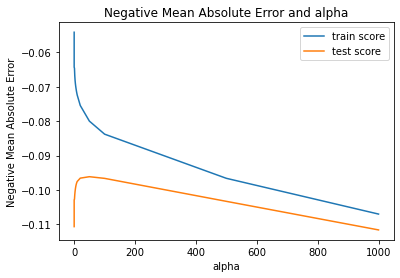

In [4967]:
# plotting mean test and train scores with alpha 
ridge_model = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_model['param_alpha'] = ridge_model['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_model['param_alpha'], ridge_model['mean_train_score'])
plt.plot(ridge_model['param_alpha'], ridge_model['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [4989]:
# Method to get the coefficient values
ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train.columns))
def find_ridge(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a dataframe for further display in the bar plot

RD_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
RD_df = RD_df.loc[RD_df['rfe_support'] == True]
RD_df.reset_index(drop=True, inplace=True)

RD_df['Coefficient'] = RD_df['Features'].apply(find_ridge)
RD_df = RD_df.sort_values(by=['Coefficient'], ascending=False)
RD_df = RD_df.head(10)
RD_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.091069
9,Condition1_Norm,True,1,0.045038
1,GrLivArea,True,1,0.039218
7,Neighborhood_NridgHt,True,1,0.039150
3,MSZoning_RL,True,1,0.036433
11,Exterior1st_BrkFace,True,1,0.035554
4,LotConfig_CulDSac,True,1,0.033744
8,Neighborhood_Somerst,True,1,0.026923
12,Foundation_PConc,True,1,0.026674
5,Neighborhood_ClearCr,True,1,0.019403


#### The 10 important features according to ridge regression that influence the house prices are
OverallQual, Condition1_Norm, GrLivArea, Neighborhood_NridgHt, MSZoning_RL, Exterior1st_BrkFace, LotConfig_CulDSac,Neighborhood_Somerst, Foundation_PConc, Neighborhood_ClearCr

#### Lasso Regression

In [4969]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [4970]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.001}


In [4971]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [4972]:
lasso.coef_

array([-9.56571095e-03,  1.30934992e-02,  1.05347367e-01,  3.99489021e-02,
        4.14602864e-03,  0.00000000e+00,  0.00000000e+00, -2.57927914e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.45660038e-02,  2.14816156e-02,  6.60657511e-05,  1.69300464e-02,
        1.42163449e-02,  1.39286118e-02, -5.70866174e-03,  2.67148256e-02,
        6.26861069e-03,  4.79741357e-02,  3.44267790e-03,  1.92428648e-02,
        1.02296286e-02,  1.04543623e-02,  3.05080809e-03,  1.69436935e-02,
       -1.68587902e-02, -0.00000000e+00,  3.68899950e-03, -4.87631699e-02,
       -1.18582794e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        4.75762103e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.62941981e-02, -6.62480692e-03, -1.11141311e-01,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.43814623e-02,  0.00000000e+00,  5.80418830e-02, -1.17352798e-02,
        0.00000000e+00, -

In [4973]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9085844610838157
0.8981261926541501
12.565435927233846
6.636093106417974
0.014443029801418214
0.01774356445566303


In [4974]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric,ls_metric],axis=1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.737906e-01,0.906018,0.908584
1,R2 Score (Test),-2.526510e+20,0.900071,0.898126
2,RSS (Train),1.734799e+01,12.918228,12.565436
3,RSS (Test),1.645777e+22,6.509378,6.636093
4,MSE (Train),1.412098e-01,0.121855,0.120179
5,MSE (Test),6.633607e+09,0.131927,0.133205


In [4986]:
# Do an RFE to minimise the features to 15
from sklearn.feature_selection import RFE

# running RFE

rfe = RFE(lasso, 15)            
rfe = rfe.fit(X_train, y_train)

C:\Users\krish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [4988]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a dataframe for further display in the bar plot

LS_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
LS_df = LS_df.loc[LS_df['rfe_support'] == True]
LS_df.reset_index(drop=True, inplace=True)

LS_df['Coefficient'] = LS_df['Features'].apply(find)
LS_df = LS_df.sort_values(by=['Coefficient'], ascending=False)
LS_df = LS_df.head(10)
LS_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.105347
7,Neighborhood_NridgHt,True,1,0.090923
11,Exterior1st_BrkFace,True,1,0.085046
1,GrLivArea,True,1,0.084566
8,Neighborhood_Somerst,True,1,0.078472
9,Condition1_Norm,True,1,0.066208
4,LotConfig_CulDSac,True,1,0.058094
3,MSZoning_RL,True,1,0.058042
5,Neighborhood_ClearCr,True,1,0.050080
12,Foundation_PConc,True,1,0.026631


#### The top 10 features according to Lasso regression which are influencing the house price are 

Overall Quality,
Neighborhood_NridgHt,
Exterior1st_BrkFace,
GrLivArea,
Neighborhood_Somerst,
Condition1_Norm,
LotConfig_CulDSac,
MSZoning_RL,
Neighborhood_ClearCr,
Foundation_PConc

#### Q1 What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [4990]:
alpha = 50*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [4991]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8955890364481358
0.8981039341248912
14.351709656435965
6.637543034288759
0.01649621799590341
0.017747441268151764


In [4992]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [4993]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8931025880637322
0.8918774813771277
14.69348205345965
7.04313620129974
0.016889059831562817
0.018831914976737273


In [4994]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric,ls_metric],axis=1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.737906e-01,0.895589,0.893103
1,R2 Score (Test),-2.526510e+20,0.898104,0.891877
2,RSS (Train),1.734799e+01,14.351710,14.693482
3,RSS (Test),1.645777e+22,6.637543,7.043136
4,MSE (Train),1.412098e-01,0.128438,0.129958
5,MSE (Test),6.633607e+09,0.133220,0.137229


In [4995]:
# Method to get the coefficient values
ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train.columns))
def find_ridge(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a dataframe for further display in the bar plot

RD_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
RD_df = RD_df.loc[RD_df['rfe_support'] == True]
RD_df.reset_index(drop=True, inplace=True)

RD_df['Coefficient'] = RD_df['Features'].apply(find_ridge)
RD_df = RD_df.sort_values(by=['Coefficient'], ascending=False)
RD_df = RD_df.head(10)
RD_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.085690
1,GrLivArea,True,1,0.035236
9,Condition1_Norm,True,1,0.034818
3,MSZoning_RL,True,1,0.030449
7,Neighborhood_NridgHt,True,1,0.025874
4,LotConfig_CulDSac,True,1,0.023326
11,Exterior1st_BrkFace,True,1,0.022645
12,Foundation_PConc,True,1,0.022344
8,Neighborhood_Somerst,True,1,0.018994
5,Neighborhood_ClearCr,True,1,0.011178


In [4996]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a dataframe for further display in the bar plot

LS_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
LS_df = LS_df.loc[LS_df['rfe_support'] == True]
LS_df.reset_index(drop=True, inplace=True)

LS_df['Coefficient'] = LS_df['Features'].apply(find)
LS_df = LS_df.sort_values(by=['Coefficient'], ascending=False)
LS_df = LS_df.head(10)
LS_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.117001
1,GrLivArea,True,1,0.076582
9,Condition1_Norm,True,1,0.058830
7,Neighborhood_NridgHt,True,1,0.053454
11,Exterior1st_BrkFace,True,1,0.049020
4,LotConfig_CulDSac,True,1,0.044538
8,Neighborhood_Somerst,True,1,0.041238
12,Foundation_PConc,True,1,0.028665
3,MSZoning_RL,True,1,0.022681
5,Neighborhood_ClearCr,True,1,0.000000


#### Q2. You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans: Though Ridge Regressor is performing little better compared to Lasso regressor, I prefer to choose Lasso as it helps in feature elimination

#### Q3.After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [4997]:
house_lasso_df = house_df

In [4999]:
house_lasso_df.drop(['OverallQual','Neighborhood_NridgHt','Exterior1st_BrkFace','GrLivArea','Neighborhood_Somerst'], axis=1, inplace=True)

In [5001]:
df_train, df_test = train_test_split(house_lasso_df, train_size=0.7,test_size = 0.3, random_state=100)

In [5002]:
scaler1 = StandardScaler()

In [5003]:
house_numeric = house_lasso_df.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,BuildingAge,RemodelAge,GarageAge
0,65.0,8450,5,196.0,706,0,150,856,856,854,...,0,0,0,0,0,2,12.247699,5,5,5.0
2,68.0,11250,5,162.0,486,0,434,920,920,866,...,0,0,0,0,0,9,12.317171,7,6,7.0
3,60.0,9550,5,0.0,216,0,540,756,961,756,...,272,0,0,0,0,2,11.849405,91,36,8.0
4,84.0,14260,5,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,12,12.429220,8,8,8.0
5,85.0,14115,5,0.0,732,0,64,796,796,566,...,0,320,0,0,700,10,11.870607,16,14,16.0


In [5004]:
num_vars = list(house_numeric.columns)
num_vars.remove('SalePrice')

In [5005]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [5006]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [5007]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [5008]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [5009]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [5010]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [5012]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.0001)

In [5013]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9460724371177538
0.8590468063308547
7.412561848265513
9.181737104022321
0.008520186032489096
0.024550099208615832


In [5014]:
# Do an RFE to minimise the features to 15
from sklearn.feature_selection import RFE

# running RFE

rfe = RFE(lasso, 15)            
rfe = rfe.fit(X_train, y_train)

C:\Users\krish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [5017]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a dataframe for further display in the bar plot

LS_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
LS_df = LS_df.loc[LS_df['rfe_support'] == True]
LS_df.reset_index(drop=True, inplace=True)

LS_df['Coefficient'] = LS_df['Features'].apply(find)
LS_df = LS_df.sort_values(by=['Coefficient'], ascending=False)
LS_df = LS_df.head(10)
LS_df

,Features,rfe_support,rfe_ranking,Coefficient
0,MSZoning_FV,True,1,0.480194
2,MSZoning_RL,True,1,0.474671
1,MSZoning_RH,True,1,0.456998
3,MSZoning_RM,True,1,0.417902
14,GarageCond_Po,True,1,0.159237
5,Condition2_PosA,True,1,0.091616
7,BsmtQual_Fa,True,1,-0.028747
9,BsmtQual_TA,True,1,-0.050763
8,BsmtQual_No Basement,True,1,-0.073905
12,KitchenQual_Gd,True,1,-0.095871


The five most important predictors are MSZoning, Garage Condition, Bsmt Quality, Condition2 and Kitchen Quality

#### Q4. How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

The model is considered more robust and generalizable when the model performs well on the unseen data and just not on the data with which it is trained
1.	Detecting and treating the outliers in the predictors 
2.	Imputing the missing values appropriately after outlier treatment with the measures of central tendency based on the nature of predictor (numerical vs categorical)
3.	Understand the feature variables in conjunction with the domain before dropping the features. Don’t drop the predictors just because the data in the predictors are skewed (We need to bother only if the target variable is skewed as it might give inclined results). Dropping the predictors unnecessarily will reduce the predictive power of the model.
4.	Scaling the predictors and target variable using scaling techniques
5.	Perform Cross Validation using K-fold to detect if there is a model overfit

Implications:
1.	The model accuracy reduces when we the outliers are not treated
2.	The model accuracy reduces when missing values are not properly imputed 
3.	The model accuracy reduces when we drop the features which has predictive power
4.	The model accuracy reduces when the predictors and target variable are not in the same scale. The model coefficients will be very large for few and very small for others which may lead to certain model coefficients (which is very small) to be insignificant
5.	Apply Regularisation techniques if overfit is detected so that model accuracy improves
